In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm
import matplotlib.colors as colors
import qcodes as qc
import qcodes.instrument_drivers.nplab_drivers as npd
from os import path
import time
from scipy.ndimage import gaussian_filter

In [3]:
%matplotlib notebook

In [4]:
npd.triton_init('lockin865', 'lockin830', 'lockin830_2', 'srframe', 'k2182')
station = qc.Station(triton, lockin865, lockin830, lockin830_2, srframe, k2182)

Connected to: OXFORD INSTRUMENTS Triton (serial:N/A, firmware:2.449) in 0.02s
Connected to: Stanford_Research_Systems SR865A (serial:003538, firmware:V1.51) in 1.16s
Connected to: Stanford_Research_Systems SR830 (serial:s/n49840, firmware:ver1.07) in 0.05s
Connected to: Stanford_Research_Systems SR830 (serial:s/n31562, firmware:ver1.07) in 0.04s
Connected to: Stanford_Research_Systems SIM900 (serial:s/n152150, firmware:ver3.6) in 0.98s
Connected to: KEITHLEY INSTRUMENTS INC. 2182A (serial:4319846, firmware:C06  /A02) in 0.04s


In [6]:
srframe.volt_p1.step = 0.08
srframe.volt_p1.inter_delay = 0.1
srframe.volt_p5.step = 0.08
srframe.volt_p5.inter_delay = 0.1
srframe.volt_p7.step = 0.2
srframe.volt_p7.inter_delay = 0.1
lockin865.amplitude.step = 0.1 #10 MOhms, so jumps of 10 nA max
lockin865.amplitude.inter_delay = 0.1
lockin830.amplitude.step = 0.1
lockin830.amplitude.inter_delay = 0.1

In [6]:
triton.fullcooldown()

In [5]:
triton.MC_temp()

60.5329

In [8]:
triton.MC_temp()

0.0452277

# W3 initial test first

In [9]:
srframe.volt_p1(9)
time.sleep(30)
gvals = np.linspace(9, -9, 361)
data1, plot1 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='W3_865_7-8_baseT_1nA_gatesweep')
srframe.volt_p1(0)

Started at 2020-09-02 10:43:16
DataSet:
   location = 'data/2020-09-02/#001_W3_865_7-8_baseT_1nA_gatesweep_10-43-13'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (361,)
   Measured | lockin865_X         | X            | (361,)
   Measured | lockin865_Y         | Y            | (361,)
Finished at 2020-09-02 10:50:33


In [12]:
srframe.volt_p1(9)
time.sleep(30)
gvals = np.linspace(9, -9, 361)
data2, plot2 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='W3_865_8-9_baseT_1nA_gatesweep')
srframe.volt_p1(0)

Started at 2020-09-02 11:00:52
DataSet:
   location = 'data/2020-09-02/#002_W3_865_8-9_baseT_1nA_gatesweep_11-00-51'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (361,)
   Measured | lockin865_X         | X            | (361,)
   Measured | lockin865_Y         | Y            | (361,)
Finished at 2020-09-02 11:08:09


<IPython.core.display.Javascript object>


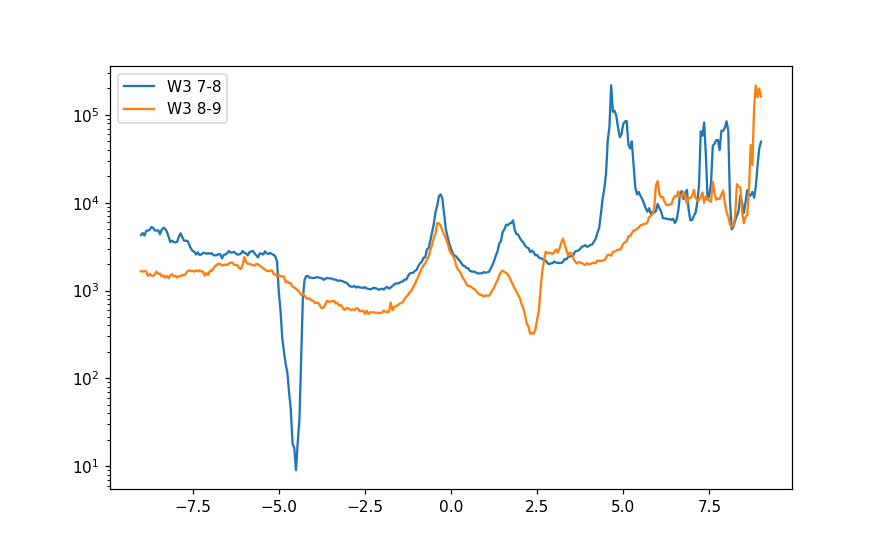

In [13]:
plt.figure(figsize=(8, 5))
plt.semilogy(data1.srframe_volt_p1_set[:], data1.lockin865_X[:]/1e-9, label='W3 7-8')
plt.semilogy(data2.srframe_volt_p1_set[:], data2.lockin865_X[:]/1e-9, label='W3 8-9')
plt.legend()

# M20 initial test

In [14]:
srframe.volt_p1(-5)
time.sleep(30)
gvals = np.linspace(-5, 5, 401)
data3, plot3 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin865.R, DataName='M20_15-16_865_baseT_1nA')
srframe.volt_p1(0)

Started at 2020-09-02 11:27:18
DataSet:
   location = 'data/2020-09-02/#003_M20_15-16_865_baseT_1nA_11-27-17'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
   Measured | lockin865_R         | R            | (401,)
Finished at 2020-09-02 11:35:36


In [17]:
srframe.volt_p1(-5)
time.sleep(30)
gvals = np.linspace(-5, 5, 401)
data4, plot4 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin865.R, DataName='M20_16-21_865_baseT_1nA')
srframe.volt_p1(0)

Started at 2020-09-02 11:40:46
DataSet:
   location = 'data/2020-09-02/#004_M20_16-21_865_baseT_1nA_11-40-45'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
   Measured | lockin865_R         | R            | (401,)
Finished at 2020-09-02 11:49:04


<IPython.core.display.Javascript object>


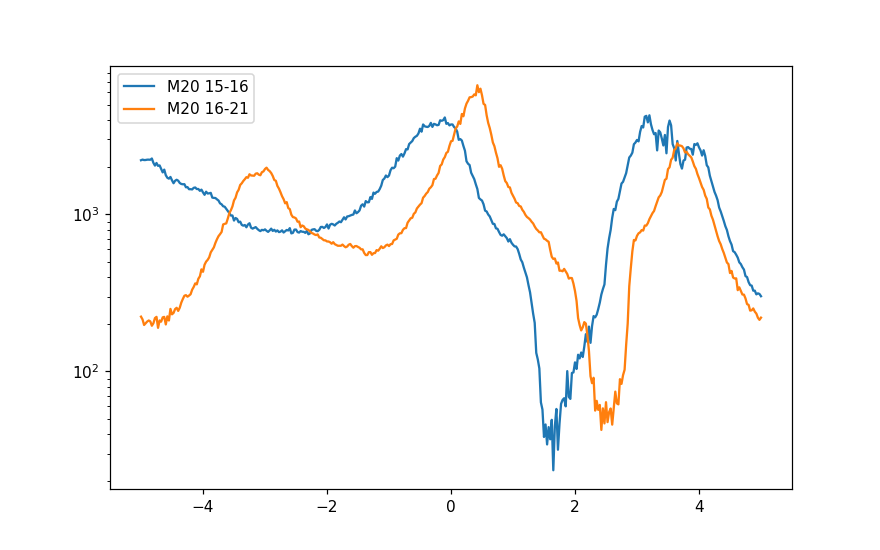

In [18]:
plt.figure(figsize=(8, 5))
plt.semilogy(data3.srframe_volt_p1_set[:], data3.lockin865_X[:]/1e-9, label='M20 15-16')
plt.semilogy(data4.srframe_volt_p1_set[:], data4.lockin865_X[:]/1e-9, label='M20 16-21')
plt.legend()

0.79 seems still ok, 0.87 seems not working, 0.83 is questionable

# S3 initial test

In [20]:
#first ground ground bottom gate, use topgate

In [21]:
srframe.volt_p1(-5)
time.sleep(30)
gvals = np.linspace(-5, 3, 321)
data5, plot5 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='S3_38-39_865_baseT_1nA')
srframe.volt_p1(0)

Started at 2020-09-02 12:03:37
DataSet:
   location = 'data/2020-09-02/#005_S3_38-39_865_baseT_1nA_12-03-36'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (321,)
   Measured | lockin865_X         | X            | (321,)
   Measured | lockin865_Y         | Y            | (321,)
Finished at 2020-09-02 12:10:06


In [22]:
srframe.volt_p1(-5)
time.sleep(30)
gvals = np.linspace(-5, 3, 321)
data6, plot6 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='S3_39-40_865_baseT_1nA')
srframe.volt_p1(0)

Started at 2020-09-02 12:14:10
DataSet:
   location = 'data/2020-09-02/#006_S3_39-40_865_baseT_1nA_12-14-09'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (321,)
   Measured | lockin865_X         | X            | (321,)
   Measured | lockin865_Y         | Y            | (321,)
Finished at 2020-09-02 12:20:39


In [24]:
srframe.volt_p1(-5)
time.sleep(30)
gvals = np.linspace(-5, 3, 321)
data7, plot7 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='S3_40-41_865_baseT_1nA')
srframe.volt_p1(0)

Started at 2020-09-02 12:28:56
DataSet:
   location = 'data/2020-09-02/#007_S3_40-41_865_baseT_1nA_12-28-56'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (321,)
   Measured | lockin865_X         | X            | (321,)
   Measured | lockin865_Y         | Y            | (321,)
Finished at 2020-09-02 12:35:35


In [27]:
srframe.volt_p1(-5)
time.sleep(30)
gvals = np.linspace(-5, 3, 321)
data8, plot8 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, DataName='S3_41-42_865_baseT_1nA')
srframe.volt_p1(0)

Started at 2020-09-02 12:41:43
DataSet:
   location = 'data/2020-09-02/#008_S3_41-42_865_baseT_1nA_12-41-42'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (321,)
   Measured | lockin865_X         | X            | (321,)
   Measured | lockin865_Y         | Y            | (321,)
Finished at 2020-09-02 12:48:11


<IPython.core.display.Javascript object>


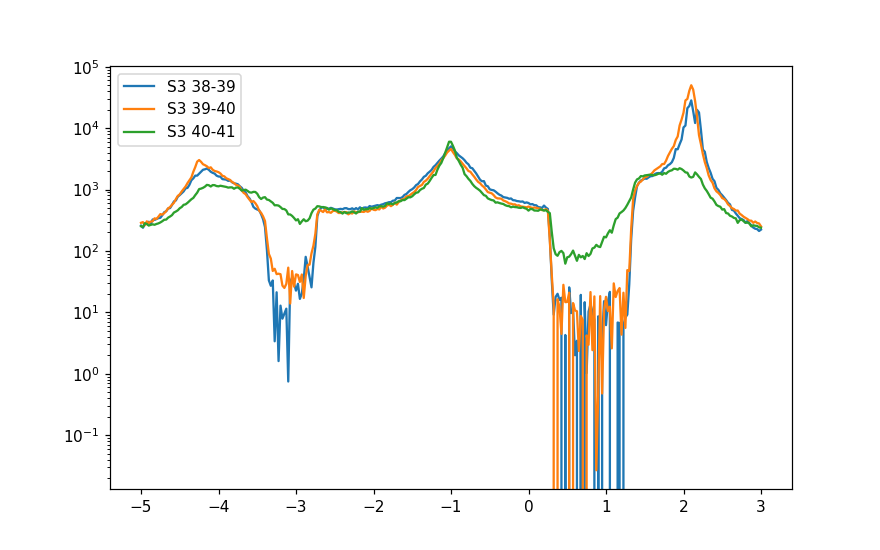

In [26]:
plt.figure(figsize=(8, 5))
plt.semilogy(data5.srframe_volt_p1_set[:], data5.lockin865_X[:]/1e-9, label='S3 38-39')
plt.semilogy(data6.srframe_volt_p1_set[:], data6.lockin865_X[:]/1e-9, label='S3 39-40')
plt.semilogy(data7.srframe_volt_p1_set[:], data7.lockin865_X[:]/1e-9, label='S3 40-41')
plt.legend()

In [28]:
#41-42 is really small angle

In [29]:
lockin865.amplitude()

0.10000000149

In [30]:
lockin865.frequency()

13.3333

In [31]:
# now volt_p5 on top gate, volt_p1 on back gate. 
# Trying out all 3 lockins at once, Vbg=0
#lockin865 on 35-34, lockin830 on 34-33, lockin830_2 on 33-32
srframe.volt_p5(-5)
time.sleep(30)

gvals = np.linspace(-5, 3, 321)
data9, plot9 = npd.single_param_sweep(srframe.volt_p5, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_33-32_1nA', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)

Started at 2020-09-02 13:18:26
DataSet:
   location = 'data/2020-09-02/#009_S3_865_35-34_830_34-33_8302_33-32_1nA_13-18-25'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (321,)
   Measured | lockin865_X         | X            | (321,)
   Measured | lockin865_Y         | Y            | (321,)
   Measured | lockin830_X         | X            | (321,)
   Measured | lockin830_Y         | Y            | (321,)
   Measured | lockin830_2_X       | X            | (321,)
   Measured | lockin830_2_Y       | Y            | (321,)
Finished at 2020-09-02 13:25:22


In [32]:
# backgate sweep, Vtg=0
srframe.volt_p1(5)
time.sleep(30)

gvals = np.linspace(5, -5.6, 321)
data10, plot10 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_33-32_1nA_backgatesweep', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)

Started at 2020-09-02 13:30:34
DataSet:
   location = 'data/2020-09-02/#010_S3_865_35-34_830_34-33_8302_33-32_1nA_backgatesweep_13-30-32'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (321,)
   Measured | lockin865_X         | X            | (321,)
   Measured | lockin865_Y         | Y            | (321,)
   Measured | lockin830_X         | X            | (321,)
   Measured | lockin830_Y         | Y            | (321,)
   Measured | lockin830_2_X       | X            | (321,)
   Measured | lockin830_2_Y       | Y            | (321,)
Finished at 2020-09-02 13:37:46


Quick 2D scan with the same electrodes

In [33]:
tgvals = np.linspace(3, -5, 101)
bgvals = np.linspace(5, -5.6, 80)
data11, plot11 = npd.twod_param_sweep(srframe.volt_p1, bgvals, srframe.volt_p5, tgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y,  SetDelay1=20, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_33-32_1nA_2dgatesweep_course', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-02 13:43:56
DataSet:
   location = 'data/2020-09-02/#011_S3_865_35-34_830_34-33_8302_33-32_1nA_2dgatesweep_course_13-43-55'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (80,)
   Setpoint | srframe_volt_p5_set | volt_p5      | (80, 101)
   Measured | lockin865_X         | X            | (80, 101)
   Measured | lockin865_Y         | Y            | (80, 101)
   Measured | lockin830_X         | X            | (80, 101)
   Measured | lockin830_Y         | Y            | (80, 101)
   Measured | lockin830_2_X       | X            | (80, 101)
   Measured | lockin830_2_Y       | Y            | (80, 101)
Finished at 2020-09-02 16:09:10
Keyboard Interrupt


In [34]:
# flip topgate and backgate axes
tgvals = np.linspace(3, -5, 81)
bgvals = np.linspace(5, -5.6, 101)
data12, plot12 = npd.twod_param_sweep(srframe.volt_p5, tgvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y,  SetDelay1=20, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_33-32_1nA_2dgatesweep_course', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-02 16:11:37
DataSet:
   location = 'data/2020-09-02/#012_S3_865_35-34_830_34-33_8302_33-32_1nA_2dgatesweep_course_16-11-35'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (81,)
   Setpoint | srframe_volt_p1_set | volt_p1      | (81, 101)
   Measured | lockin865_X         | X            | (81, 101)
   Measured | lockin865_Y         | Y            | (81, 101)
   Measured | lockin830_X         | X            | (81, 101)
   Measured | lockin830_Y         | Y            | (81, 101)
   Measured | lockin830_2_X       | X            | (81, 101)
   Measured | lockin830_2_Y       | Y            | (81, 101)
Finished at 2020-09-02 20:15:35


In [35]:
# switch third pair to opposite side for a quick check
tgvals = np.linspace(-5, 0, 51)
bgvals = np.linspace(5, -5.6, 101)
data13, plot13 = npd.twod_param_sweep(srframe.volt_p5, tgvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y,  SetDelay1=20, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_2dgatesweep_course', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-02 20:21:30
DataSet:
   location = 'data/2020-09-02/#013_S3_865_35-34_830_34-33_8302_40-41_1nA_2dgatesweep_course_20-21-28'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (51,)
   Setpoint | srframe_volt_p1_set | volt_p1      | (51, 101)
   Measured | lockin865_X         | X            | (51, 101)
   Measured | lockin865_Y         | Y            | (51, 101)
   Measured | lockin830_X         | X            | (51, 101)
   Measured | lockin830_Y         | Y            | (51, 101)
   Measured | lockin830_2_X       | X            | (51, 101)
   Measured | lockin830_2_Y       | Y            | (51, 101)
Finished at 2020-09-02 22:02:55
Keyboard Interrupt


In [36]:
#seems 40-41 is bit better than 33-32

In [37]:
# fine scan should be around 15hrs maybe
tgvals = np.linspace(3, -5, 321)
bgvals = np.linspace(5, -5.6, 212)
data14, plot14 = npd.twod_param_sweep(srframe.volt_p5, tgvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y,  SetDelay1=20, SetDelay2=0.7, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_2dgatesweep_fine', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-02 22:13:51
DataSet:
   location = 'data/2020-09-02/#014_S3_865_35-34_830_34-33_8302_40-41_1nA_2dgatesweep_fine_22-13-49'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (321,)
   Setpoint | srframe_volt_p1_set | volt_p1      | (321, 212)
   Measured | lockin865_X         | X            | (321, 212)
   Measured | lockin865_Y         | Y            | (321, 212)
   Measured | lockin830_X         | X            | (321, 212)
   Measured | lockin830_Y         | Y            | (321, 212)
   Measured | lockin830_2_X       | X            | (321, 212)
   Measured | lockin830_2_Y       | Y            | (321, 212)
Finished at 2020-09-03 17:40:10


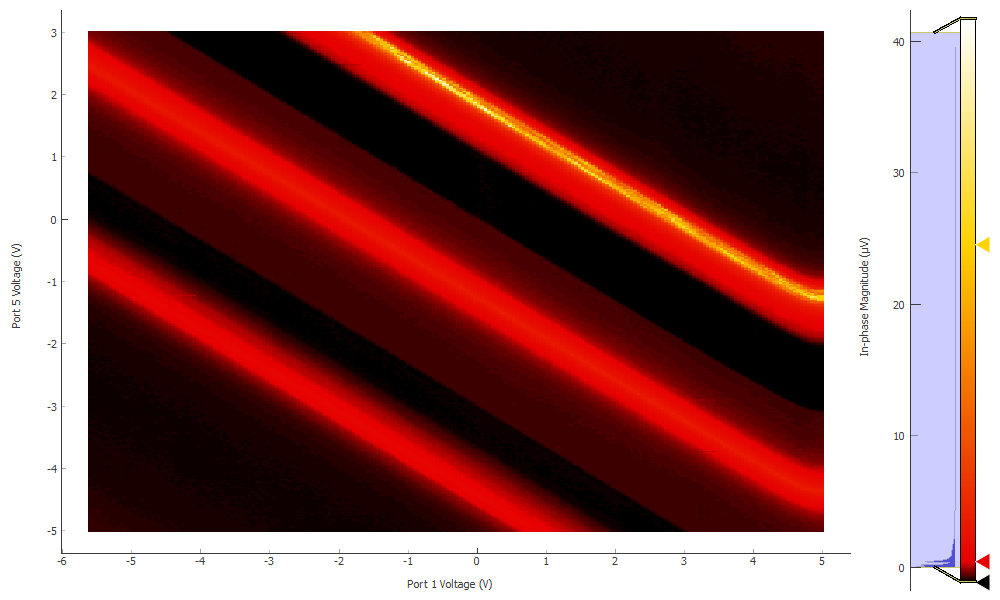

In [38]:
plot14[0]

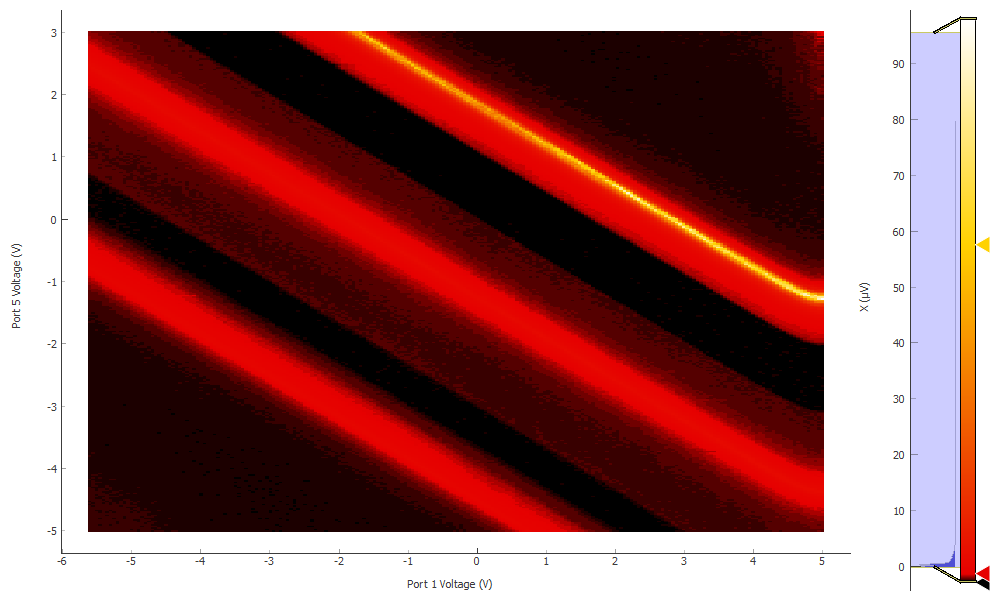

In [42]:
plot14[1]

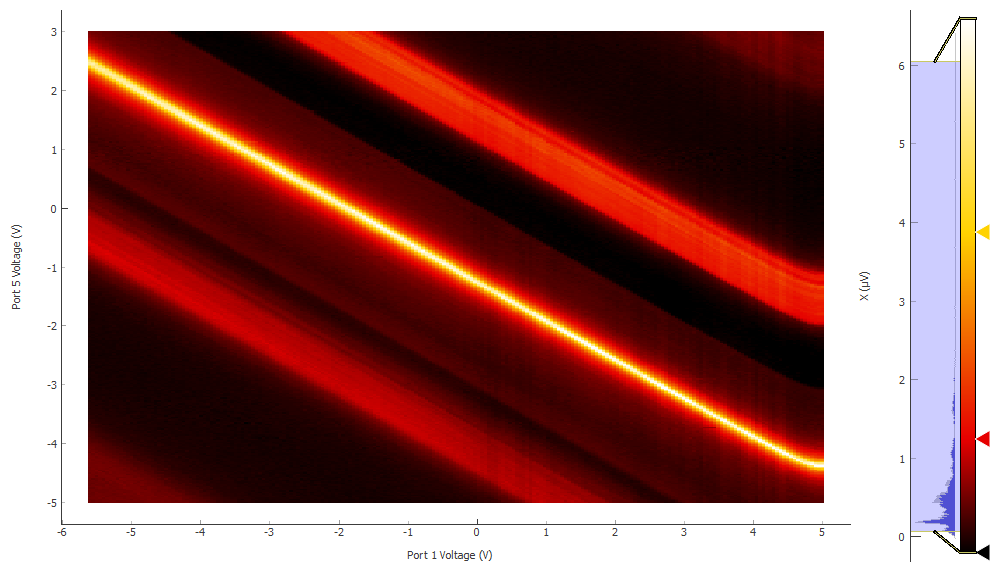

In [43]:
plot14[2]

## Do a quick field sweep to determine the critical field in the electron-side SC

In [44]:
srframe.volt_p5(0.58)

In [45]:
triton.field(4)
data15, plot15 = npd.data_log(0.7, triton.field, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, minutes=30, breakif=npd.breakat(triton.field, 4, 0.002, 10), DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_criticalfield_Vbg0_Vtg0p58', XParam=triton.field, YParam=[lockin865.X, lockin830.X, lockin830_2.X])

Are you sure you want to use the magnet? [y/n]: y
Started at 2020-09-03 17:48:59
DataSet:
   location = 'data/2020-09-03/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_criticalfield_Vbg0_Vtg0p58_17-48-57'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | count_set     | count        | (2572,)
   Measured | time0         | time0        | (2572,)
   Measured | triton_field  | field        | (2572,)
   Measured | lockin865_X   | X            | (2572,)
   Measured | lockin865_Y   | Y            | (2572,)
   Measured | lockin830_X   | X            | (2572,)
   Measured | lockin830_Y   | Y            | (2572,)
   Measured | lockin830_2_X | X            | (2572,)
   Measured | lockin830_2_Y | Y            | (2572,)
Finished at 2020-09-03 18:08:48


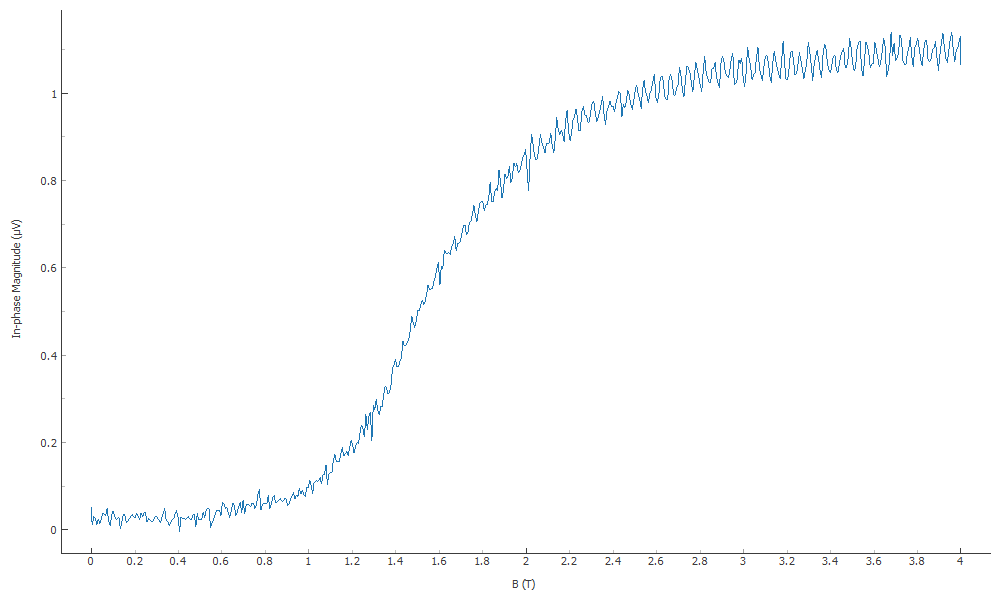

In [46]:
plot15[0]

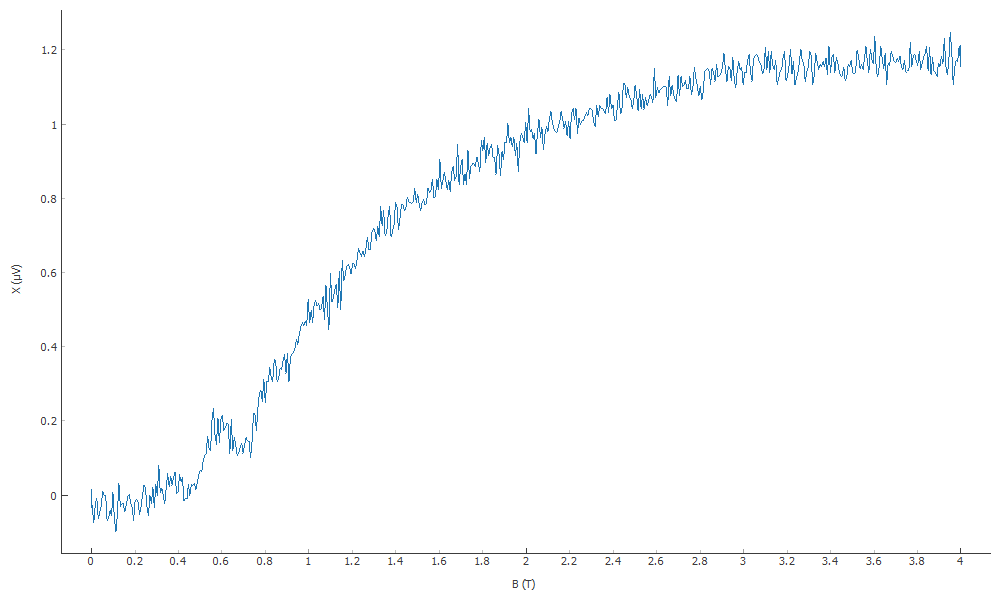

In [47]:
plot15[1]

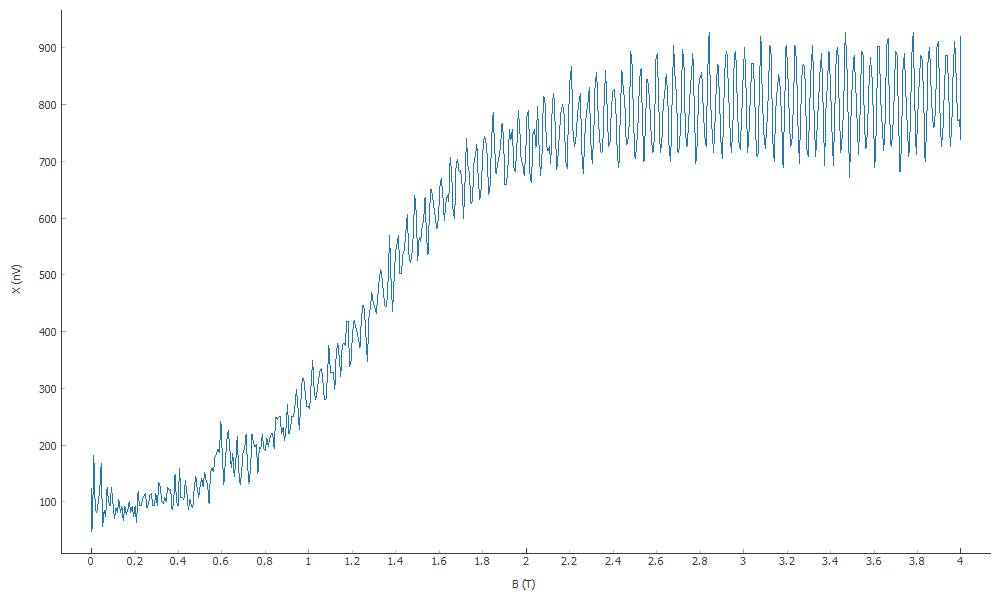

In [48]:
plot15[2]

Some of these oscillations seem persistent even when the magnetic field is stable. They seem to disappear for certain frequencies. In this case, 11.111 seems to work well.

In [50]:
srframe.volt_p1(0)

In [51]:
# simple topgate scan, 4T
srframe.volt_p5(-5)
time.sleep(25)
gvals = np.linspace(-5, 3, 321)
data16, plot16 = npd.single_param_sweep(srframe.volt_p5, gvals, 0.8, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_4T_Vbg0_topgatesweep', YParam=[lockin865.X, lockin830.X, lockin830_2.X])

Started at 2020-09-03 18:28:36
DataSet:
   location = 'data/2020-09-03/#003_S3_865_35-34_830_34-33_8302_40-41_1nA_4T_Vbg0_topgatesweep_18-28-34'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (321,)
   Measured | lockin865_X         | X            | (321,)
   Measured | lockin865_Y         | Y            | (321,)
   Measured | lockin830_X         | X            | (321,)
   Measured | lockin830_Y         | Y            | (321,)
   Measured | lockin830_2_X       | X            | (321,)
   Measured | lockin830_2_Y       | Y            | (321,)
Finished at 2020-09-03 18:34:03


In [52]:
srframe.volt_p5(0)

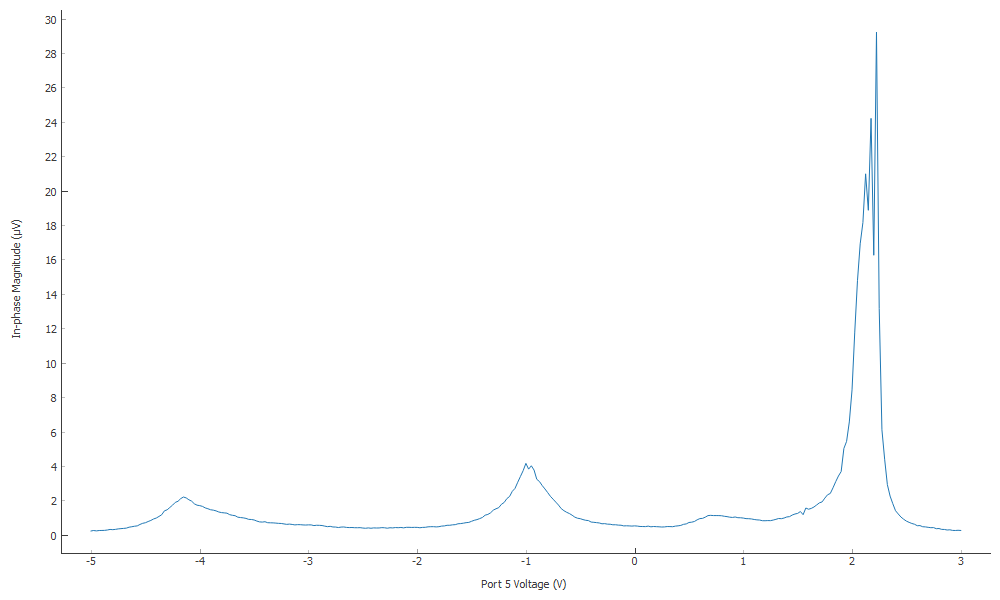

In [53]:
plot16[0]  # a nice half-filling feature

## 0-electric field B-gate diagrams

In [13]:
# figured out the zero-field slope by fitting the CNP peaks in the 2d diagram
zfieldslope = 0.6629105490080421

In [14]:
def zeroDsweep(vbg):
    """Defined with vbg as volt_p1, vtg as volt_p5. Just enter the back gate voltage. The main range 
    of the flat bands is around -4 to 2Vbg"""
    srframe.volt_p1(vbg)
    srframe.volt_p5(zfieldslope*vbg)
    
zeroDparam = qc.Parameter('zeroDparam', set_cmd=zeroDsweep, label='Vbg', unit='V')

In [58]:
zeroDparam(2)

In [59]:
bgvals = np.linspace(-4, 2, 301)
zeroDparam(-4)
time.sleep(25)
data17, plot17 = npd.single_param_sweep(zeroDparam, bgvals, 0.7, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-03 19:03:19
DataSet:
   location = 'data/2020-09-03/#004_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep_19-03-18'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (301,)
   Measured | lockin865_X    | X            | (301,)
   Measured | lockin865_Y    | Y            | (301,)
   Measured | lockin830_X    | X            | (301,)
   Measured | lockin830_Y    | Y            | (301,)
   Measured | lockin830_2_X  | X            | (301,)
   Measured | lockin830_2_Y  | Y            | (301,)
Finished at 2020-09-03 19:08:06


Back to 17.7 Hz because it seems to get rid of some noise

In [68]:
bgvals = np.linspace(-3.5, 2, 441)
Bvals = np.linspace(0, 5, 101)

data18, plot18 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=0.7, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_0D_0to5T_fieldgate', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-03 19:24:54
DataSet:
   location = 'data/2020-09-03/#005_S3_865_35-34_830_34-33_8302_40-41_1nA_0D_0to5T_fieldgate_19-24-52'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (101,)
   Setpoint | zeroDparam_set              | zeroDparam       | (101, 441)
   Measured | lockin865_X                 | X                | (101, 441)
   Measured | lockin865_Y                 | Y                | (101, 441)
   Measured | lockin830_X                 | X                | (101, 441)
   Measured | lockin830_Y                 | Y                | (101, 441)
   Measured | lockin830_2_X               | X                | (101, 441)
   Measured | lockin830_2_Y               | Y                | (101, 441)
Finished at 2020-09-04 08:22:18


In [69]:
data18 = qc.load_data('data/2020-09-03/#005_S3_865_35-34_830_34-33_8302_40-41_1nA_0D_0to5T_fieldgate_19-24-52')
plot18 = qc.QtPlot(data18.lockin865_X)

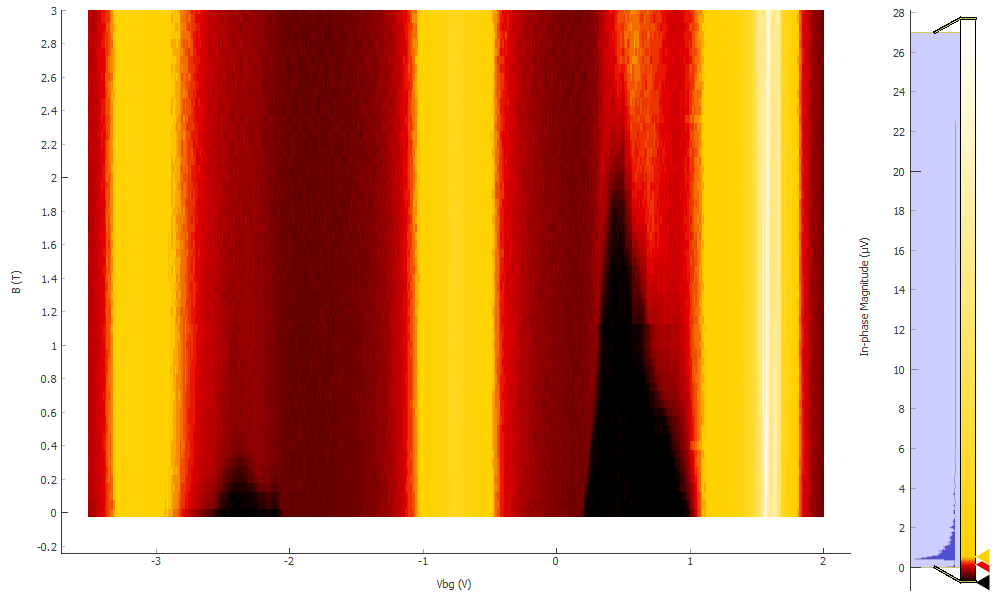

In [71]:
plot18

In [69]:
bgvals = np.linspace(-3.5, 2, 441)
Bvals = np.concatenate((np.linspace(5.05, 7.95, 59), [7.998]))
triton.magnet_POC(1)
data19, plot19 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=0.7, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_0D_5to8T_fieldgate', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-04 08:22:20
DataSet:
   location = 'data/2020-09-04/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_0D_5to8T_fieldgate_08-22-18'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (60,)
   Setpoint | zeroDparam_set              | zeroDparam       | (60, 441)
   Measured | lockin865_X                 | X                | (60, 441)
   Measured | lockin865_Y                 | Y                | (60, 441)
   Measured | lockin830_X                 | X                | (60, 441)
   Measured | lockin830_Y                 | Y                | (60, 441)
   Measured | lockin830_2_X               | X                | (60, 441)
   Measured | lockin830_2_Y               | Y                | (60, 441)
Finished at 2020-09-05 06:27:17


In [70]:
triton.field_set_stable[5]

<qcodes.instrument.sweep_values.SweepFixedValues: field_set_stable at 2256914707736>

In [72]:
triton.field_set_stable(5)

In [71]:
triton.field_set_stable[1.5]

<qcodes.instrument.sweep_values.SweepFixedValues: field_set_stable at 2256914707960>

In [73]:
triton.field_set_stable(1.5)

# S3 1.5T 2D gate sweep

In [74]:
time.sleep(60)

In [75]:
# fine scan should be around 12hrs at 1.5T
tgvals = np.linspace(3, -5, 201)
bgvals = np.linspace(5, -5.6, 212)
data20, plot20 = npd.twod_param_sweep(srframe.volt_p5, tgvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y,  SetDelay1=20, SetDelay2=0.7, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_2dgatesweep_1p5T', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-05 09:04:23
DataSet:
   location = 'data/2020-09-05/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_2dgatesweep_1p5T_09-04-21'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Setpoint | srframe_volt_p1_set | volt_p1      | (201, 212)
   Measured | lockin865_X         | X            | (201, 212)
   Measured | lockin865_Y         | Y            | (201, 212)
   Measured | lockin830_X         | X            | (201, 212)
   Measured | lockin830_Y         | Y            | (201, 212)
   Measured | lockin830_2_X       | X            | (201, 212)
   Measured | lockin830_2_Y       | Y            | (201, 212)
Finished at 2020-09-05 21:16:04


In [76]:
triton.field(0)

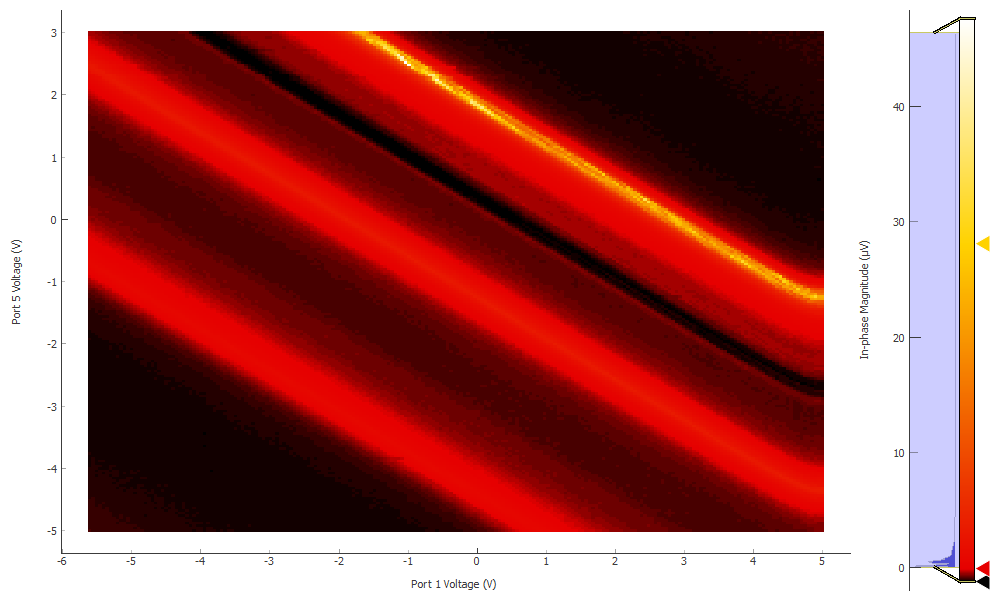

In [77]:
plot20[0]

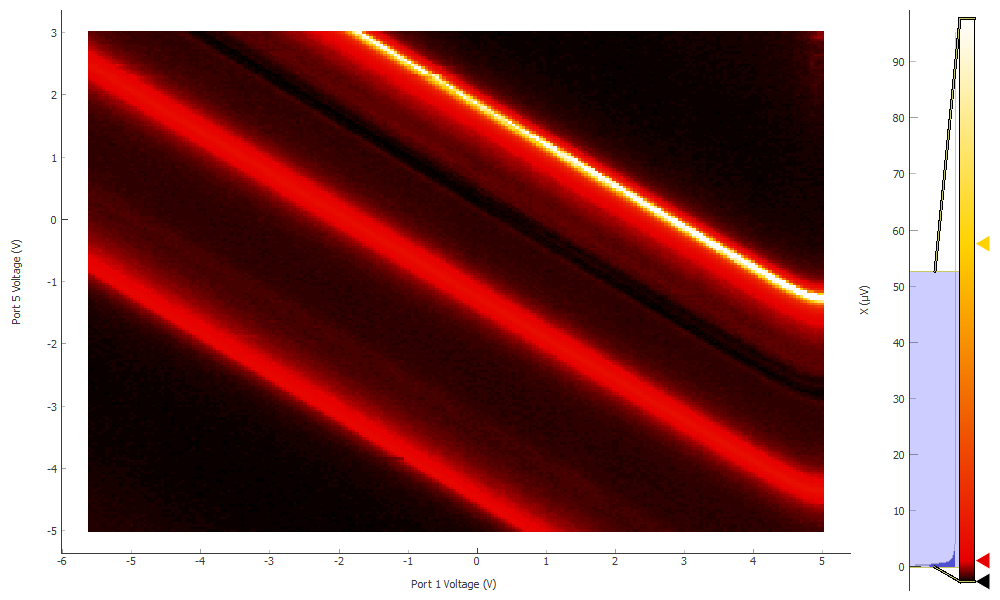

In [78]:
plot20[1]

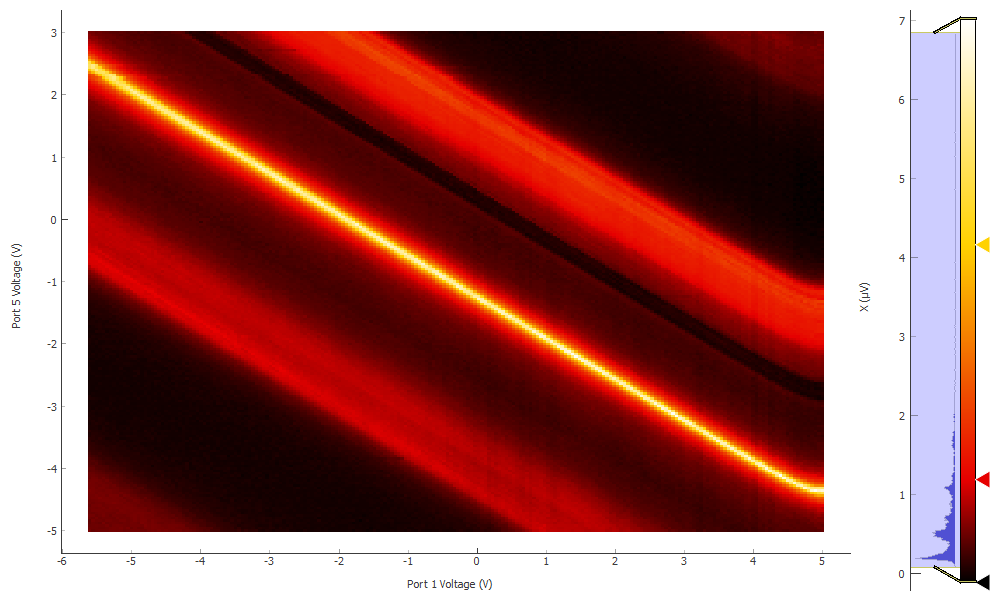

In [79]:
plot20[2]

In [80]:
#there seems to be some D field dependence, check it later

# S3 D0 T dependence

In [81]:
bgvals = np.linspace(-3.5, 2, 551)# sensor disconnected
zeroDparam(-3.5)
time.sleep(25)
data21, plot21 = npd.single_param_sweep(zeroDparam, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep_baseT', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-05 21:39:50
DataSet:
   location = 'data/2020-09-05/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep_baseT_21-39-49'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (551,)
   Measured | lockin865_X    | X            | (551,)
   Measured | lockin865_Y    | Y            | (551,)
   Measured | lockin830_X    | X            | (551,)
   Measured | lockin830_Y    | Y            | (551,)
   Measured | lockin830_2_X  | X            | (551,)
   Measured | lockin830_2_Y  | Y            | (551,)
Finished at 2020-09-05 21:52:15


In [82]:
triton.pid_setpoint(0.05)

In [85]:
triton.pid_range(10)

In [84]:
triton.pid_mode(1)

In [86]:
zeroDparam(-3.5)
time.sleep(25)
Tvals = np.linspace(0.05, 1, 20)
bgvals = np.linspace(-3.5, 2, 551)
data22, plot22 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweepto1K')
zeroDparam(0)

Started at 2020-09-05 21:59:31
DataSet:
   location = 'data/2020-09-05/#003_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweepto1K_21-59-28'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (20,)
   Setpoint | zeroDparam_set          | zeroDparam   | (20, 551)
   Measured | lockin865_X             | X            | (20, 551)
   Measured | lockin865_Y             | Y            | (20, 551)
   Measured | lockin830_X             | X            | (20, 551)
   Measured | lockin830_Y             | Y            | (20, 551)
   Measured | lockin830_2_X           | X            | (20, 551)
   Measured | lockin830_2_Y           | Y            | (20, 551)
Finished at 2020-09-06 03:02:34


In [87]:
triton.pid_range(31.6)
time.sleep(10)
triton.pid_setpoint(1.1)

In [91]:
triton.pid_setpoint(1.05)

In [92]:
zeroDparam(-3.5)
time.sleep(25)
Tvals = np.linspace(1.05, 1.4, 8)
bgvals = np.linspace(-3.5, 2, 551)
data23, plot23 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_1p05to1p4K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-06 08:51:20
DataSet:
   location = 'data/2020-09-06/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_1p05to1p4K_08-51-18'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (8,)
   Setpoint | zeroDparam_set          | zeroDparam   | (8, 551)
   Measured | lockin865_X             | X            | (8, 551)
   Measured | lockin865_Y             | Y            | (8, 551)
   Measured | lockin830_X             | X            | (8, 551)
   Measured | lockin830_Y             | Y            | (8, 551)
   Measured | lockin830_2_X           | X            | (8, 551)
   Measured | lockin830_2_Y           | Y            | (8, 551)
Finished at 2020-09-06 10:52:34


In [93]:
triton.pid_range(100)
time.sleep(10)
triton.pid_setpoint(1.45)

In [94]:
zeroDparam(-3.5)
time.sleep(25)
Tvals = np.linspace(1.45, 2, 12)
bgvals = np.linspace(-3.5, 2, 551)
data24, plot24 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_1p45to2K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-06 10:53:23
DataSet:
   location = 'data/2020-09-06/#003_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_1p45to2K_10-53-21'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (12,)
   Setpoint | zeroDparam_set          | zeroDparam   | (12, 551)
   Measured | lockin865_X             | X            | (12, 551)
   Measured | lockin865_Y             | Y            | (12, 551)
   Measured | lockin830_X             | X            | (12, 551)
   Measured | lockin830_Y             | Y            | (12, 551)
   Measured | lockin830_2_X           | X            | (12, 551)
   Measured | lockin830_2_Y           | Y            | (12, 551)
Finished at 2020-09-06 13:55:29


In [95]:
triton.pid_setpoint(2.1)

In [96]:
zeroDparam(-3.5)
time.sleep(25)
Tvals = np.linspace(2.1, 10, 80)
bgvals = np.linspace(-3.5, 2, 551)
data25, plot25 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_2p1to10K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-06 14:00:31
DataSet:
   location = 'data/2020-09-06/#004_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_2p1to10K_14-00-29'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (80,)
   Setpoint | zeroDparam_set          | zeroDparam   | (80, 551)
   Measured | lockin865_X             | X            | (80, 551)
   Measured | lockin865_Y             | Y            | (80, 551)
   Measured | lockin830_X             | X            | (80, 551)
   Measured | lockin830_Y             | Y            | (80, 551)
   Measured | lockin830_2_X           | X            | (80, 551)
   Measured | lockin830_2_Y           | Y            | (80, 551)
Finished at 2020-09-07 10:14:38


In [97]:
zeroDparam(-3.5)
time.sleep(25)
Tvals = np.linspace(10.5, 30, 40)
bgvals = np.linspace(-3.5, 2, 551)
data26, plot26 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=240, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_10p5to30K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-07 10:15:16
DataSet:
   location = 'data/2020-09-07/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_10p5to30K_10-15-14'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (40,)
   Setpoint | zeroDparam_set          | zeroDparam   | (40, 551)
   Measured | lockin865_X             | X            | (40, 551)
   Measured | lockin865_Y             | Y            | (40, 551)
   Measured | lockin830_X             | X            | (40, 551)
   Measured | lockin830_Y             | Y            | (40, 551)
   Measured | lockin830_2_X           | X            | (40, 551)
   Measured | lockin830_2_Y           | Y            | (40, 551)
Finished at 2020-09-07 21:01:51


In [98]:
triton.write('SET:DEV:V1:VALV:SIG:STATE:CLOSE')

In [99]:
time.sleep(60)

In [100]:
triton.pid_setpoint(30.5)

In [101]:
time.sleep(10)

In [102]:
zeroDparam(-3.5)
time.sleep(25)
Tvals = np.linspace(30.5, 40, 20)
bgvals = np.linspace(-3.5, 2, 551)
data27, plot27 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=420, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_30p5to40K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-07 21:03:41
DataSet:
   location = 'data/2020-09-07/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_D0_gateTsweep_30p5to40K_21-03-39'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (20,)
   Setpoint | zeroDparam_set          | zeroDparam   | (20, 551)
   Measured | lockin865_X             | X            | (20, 551)
   Measured | lockin865_Y             | Y            | (20, 551)
   Measured | lockin830_X             | X            | (20, 551)
   Measured | lockin830_Y             | Y            | (20, 551)
   Measured | lockin830_2_X           | X            | (20, 551)
   Measured | lockin830_2_Y           | Y            | (20, 551)
Finished at 2020-09-08 03:27:01


In [103]:
lockin865.amplitude(0)
time.sleep(5)

In [104]:
triton.pid_mode(0)
time.sleep(10)

In [105]:
triton.alltempsenable()
time.sleep(20)

In [106]:
triton.write('SET:SYS:DR:ACTN:CLDN')

In [111]:
triton.read_temps()

MC - on:  0.026588 K
MC_cernox - on:  321.181 K
still - on:  0.813382 K
cold_plate - on:  0.0741546 K
magnet - on:  4.07175 K
PT2h - on:  3.27138 K
PT2p - on:  3.49733 K
PT1h - on:  47.3755 K
PT1p - on:  62.3778 K


In [113]:
lockin865.amplitude(0.1)

# go to 5K do in plane field

In [126]:
triton.pid_range(100)

In [137]:
triton.pid_setpoint(5)

In [116]:
triton.pid_mode(1)

In [139]:
lockin865.amplitude(0.3)#3nA

In [140]:
bgvals = np.linspace(-1, 1.9, 291)# sensor disconnected
zeroDparam(-1)
time.sleep(25)
data28, plot28 = npd.single_param_sweep(zeroDparam, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_3nA_0T_0Dsweep_5K', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-08 10:23:30
DataSet:
   location = 'data/2020-09-08/#001_S3_865_35-34_830_34-33_8302_40-41_3nA_0T_0Dsweep_5K_10-23-28'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (291,)
   Measured | lockin865_X    | X            | (291,)
   Measured | lockin865_Y    | Y            | (291,)
   Measured | lockin830_X    | X            | (291,)
   Measured | lockin830_Y    | Y            | (291,)
   Measured | lockin830_2_X  | X            | (291,)
   Measured | lockin830_2_Y  | Y            | (291,)
Finished at 2020-09-08 10:30:02


In [141]:
bgvals = np.linspace(-1, 1.9, 581)
Bvals = np.linspace(0, 5, 51)
data29, plot29 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_3nA_0D_0to5T_fieldgate_5K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-08 10:37:37
DataSet:
   location = 'data/2020-09-08/#002_S3_865_35-34_830_34-33_8302_40-41_3nA_0D_0to5T_fieldgate_5K_10-37-35'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (51,)
   Setpoint | zeroDparam_set              | zeroDparam       | (51, 581)
   Measured | lockin865_X                 | X                | (51, 581)
   Measured | lockin865_Y                 | Y                | (51, 581)
   Measured | lockin830_X                 | X                | (51, 581)
   Measured | lockin830_Y                 | Y                | (51, 581)
   Measured | lockin830_2_X               | X                | (51, 581)
   Measured | lockin830_2_Y               | Y                | (51, 581)
Finished at 2020-09-08 22:39:13


In [142]:
bgvals = np.linspace(-1, 1.9, 581)
Bvals = np.concatenate((np.linspace(5.1, 7.9, 29), [7.998]))
triton.magnet_POC(1)
data30, plot30 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_3nA_0D_5p1to8T_fieldgate_5K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-08 22:39:16
DataSet:
   location = 'data/2020-09-08/#003_S3_865_35-34_830_34-33_8302_40-41_3nA_0D_5p1to8T_fieldgate_5K_22-39-14'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (30,)
   Setpoint | zeroDparam_set              | zeroDparam       | (30, 581)
   Measured | lockin865_X                 | X                | (30, 581)
   Measured | lockin865_Y                 | Y                | (30, 581)
   Measured | lockin830_X                 | X                | (30, 581)
   Measured | lockin830_Y                 | Y                | (30, 581)
   Measured | lockin830_2_X               | X                | (30, 581)
   Measured | lockin830_2_Y               | Y                | (30, 581)
Finished at 2020-09-09 12:43:43


In [144]:
triton.pid_setpoint(10)

# go to 12K do in plane field

In [145]:
bgvals = np.linspace(-1, 1.9, 291)
zeroDparam(-1)
time.sleep(25)
data31, plot31 = npd.single_param_sweep(zeroDparam, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_3nA_8T_0Dsweep_10K', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-09 12:55:27
DataSet:
   location = 'data/2020-09-09/#001_S3_865_35-34_830_34-33_8302_40-41_3nA_8T_0Dsweep_10K_12-55-26'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (291,)
   Measured | lockin865_X    | X            | (291,)
   Measured | lockin865_Y    | Y            | (291,)
   Measured | lockin830_X    | X            | (291,)
   Measured | lockin830_Y    | Y            | (291,)
   Measured | lockin830_2_X  | X            | (291,)
   Measured | lockin830_2_Y  | Y            | (291,)
Finished at 2020-09-09 13:02:00


In [146]:
triton.pid_setpoint(12)

In [152]:
bgvals = np.linspace(-1, 1.9, 291)
zeroDparam(-1)
time.sleep(25)
data32, plot32 = npd.single_param_sweep(zeroDparam, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_5nA_8T_0Dsweep_12K', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-09 13:30:09
DataSet:
   location = 'data/2020-09-09/#003_S3_865_35-34_830_34-33_8302_40-41_5nA_8T_0Dsweep_12K_13-30-08'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (291,)
   Measured | lockin865_X    | X            | (291,)
   Measured | lockin865_Y    | Y            | (291,)
   Measured | lockin830_X    | X            | (291,)
   Measured | lockin830_Y    | Y            | (291,)
   Measured | lockin830_2_X  | X            | (291,)
   Measured | lockin830_2_Y  | Y            | (291,)
Finished at 2020-09-09 13:36:42


In [151]:
lockin865.amplitude(0.5)#5nA

In [148]:
Bvals = np.concatenate(([7.998], np.linspace(7.9, 6.1, 19)))

In [153]:
bgvals = np.linspace(-1, 1.9, 581)
Bvals = np.concatenate(([7.998], np.linspace(7.9, 6.1, 19)))
data33, plot33 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_5nA_0D_5p1to8T_fieldgate_12K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-09 13:37:47
DataSet:
   location = 'data/2020-09-09/#004_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_5p1to8T_fieldgate_12K_13-37-45'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (20,)
   Setpoint | zeroDparam_set              | zeroDparam       | (20, 581)
   Measured | lockin865_X                 | X                | (20, 581)
   Measured | lockin865_Y                 | Y                | (20, 581)
   Measured | lockin830_X                 | X                | (20, 581)
   Measured | lockin830_Y                 | Y                | (20, 581)
   Measured | lockin830_2_X               | X                | (20, 581)
   Measured | lockin830_2_Y               | Y                | (20, 581)
Finished at 2020-09-09 23:09:21


In [154]:
bgvals = np.linspace(-1, 1.9, 581)
Bvals = np.linspace(6, 0, 61)
triton.magnet_POC(0)
data34, plot34 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6to0T_fieldgate_12K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-09 23:09:23
DataSet:
   location = 'data/2020-09-09/#005_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6to0T_fieldgate_12K_23-09-21'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (61,)
   Setpoint | zeroDparam_set              | zeroDparam       | (61, 581)
   Measured | lockin865_X                 | X                | (61, 581)
   Measured | lockin865_Y                 | Y                | (61, 581)
   Measured | lockin830_X                 | X                | (61, 581)
   Measured | lockin830_Y                 | Y                | (61, 581)
   Measured | lockin830_2_X               | X                | (61, 581)
   Measured | lockin830_2_Y               | Y                | (61, 581)
Finished at 2020-09-10 13:15:04


In [ ]:
#12K shows some tunability with 1 quarter

# go to 16K do in plane field

In [155]:
triton.pid_setpoint(16)

In [156]:
bgvals = np.linspace(-1, 1.9, 581)
Bvals = np.linspace(0, 6, 61)
triton.magnet_POC(0)
data35, plot35 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6to0T_fieldgate_16K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-10 13:56:20
DataSet:
   location = 'data/2020-09-10/#001_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6to0T_fieldgate_16K_13-56-19'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (61,)
   Setpoint | zeroDparam_set              | zeroDparam       | (61, 581)
   Measured | lockin865_X                 | X                | (61, 581)
   Measured | lockin865_Y                 | Y                | (61, 581)
   Measured | lockin830_X                 | X                | (61, 581)
   Measured | lockin830_Y                 | Y                | (61, 581)
   Measured | lockin830_2_X               | X                | (61, 581)
   Measured | lockin830_2_Y               | Y                | (61, 581)
Finished at 2020-09-11 03:57:03


In [157]:
bgvals = np.linspace(-1, 1.9, 581)
Bvals = np.concatenate((np.linspace(6.1, 7.9, 19), [7.998]))
triton.magnet_POC(1)
data36, plot36 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6p1to8T_fieldgate_16K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-11 03:57:06
DataSet:
   location = 'data/2020-09-11/#001_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6p1to8T_fieldgate_16K_03-57-04'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (20,)
   Setpoint | zeroDparam_set              | zeroDparam       | (20, 581)
   Measured | lockin865_X                 | X                | (20, 581)
   Measured | lockin865_Y                 | Y                | (20, 581)
   Measured | lockin830_X                 | X                | (20, 581)
   Measured | lockin830_Y                 | Y                | (20, 581)
   Measured | lockin830_2_X               | X                | (20, 581)
   Measured | lockin830_2_Y               | Y                | (20, 581)
Finished at 2020-09-11 13:21:10


In [159]:
triton.pid_setpoint(22)

# go to 22K do in plane field

In [160]:
bgvals = np.linspace(-1, 1.9, 581)
Bvals = np.concatenate(([7.998], np.linspace(7.9, 6.1, 19)))
data37, plot37 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_5nA_0D_8to6p1T_fieldgate_22K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-11 13:57:31
DataSet:
   location = 'data/2020-09-11/#002_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_8to6p1T_fieldgate_22K_13-57-29'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (20,)
   Setpoint | zeroDparam_set              | zeroDparam       | (20, 581)
   Measured | lockin865_X                 | X                | (20, 581)
   Measured | lockin865_Y                 | Y                | (20, 581)
   Measured | lockin830_X                 | X                | (20, 581)
   Measured | lockin830_Y                 | Y                | (20, 581)
   Measured | lockin830_2_X               | X                | (20, 581)
   Measured | lockin830_2_Y               | Y                | (20, 581)
Finished at 2020-09-11 23:30:46


In [161]:
bgvals = np.linspace(-1, 1.9, 581)
Bvals = np.linspace(6, 0, 61)
triton.magnet_POC(0)
data38, plot38 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6to0T_fieldgate_22K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-11 23:30:59
DataSet:
   location = 'data/2020-09-11/#003_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6to0T_fieldgate_22K_23-30-47'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (61,)
   Setpoint | zeroDparam_set              | zeroDparam       | (61, 581)
   Measured | lockin865_X                 | X                | (61, 581)
   Measured | lockin865_Y                 | Y                | (61, 581)
   Measured | lockin830_X                 | X                | (61, 581)
   Measured | lockin830_Y                 | Y                | (61, 581)
   Measured | lockin830_2_X               | X                | (61, 581)
   Measured | lockin830_2_Y               | Y                | (61, 581)
Finished at 2020-09-12 13:36:44


In [168]:
lockin865.amplitude(0)
time.sleep(5)

In [163]:
triton.magnet_POC(1)

In [166]:
triton.pid_mode(0)

In [167]:
triton.alltempsenable()
time.sleep(20)

In [169]:
triton.write('SET:SYS:DR:ACTN:CLDN')

In [165]:
triton.magnet_swh(0)

Wait 5 min for the switch to cool


In [226]:
triton.read_temps()

MC - on:  0.054271 K
MC_cernox - on:  321.181 K
still - on:  0.933835 K
cold_plate - on:  0.117058 K
magnet - on:  4.07175 K
PT2h - on:  3.29344 K
PT2p - on:  3.53427 K
PT1h - on:  48.3983 K
PT1p - on:  64.7678 K


In [215]:
triton.ask('READ:SYS:DR:ACTN')

'STAT:SYS:DR:ACTN:NONE'

# go to 2.2K for half filling change

In [228]:
lockin865.amplitude(0.1)

In [229]:
bgvals = np.linspace(-1, 1.9, 291)
zeroDparam(-1)
time.sleep(25)
data39, plot39 = npd.single_param_sweep(zeroDparam, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep_50mK', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-12 17:48:47
DataSet:
   location = 'data/2020-09-12/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep_50mK_17-48-45'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (291,)
   Measured | lockin865_X    | X            | (291,)
   Measured | lockin865_Y    | Y            | (291,)
   Measured | lockin830_X    | X            | (291,)
   Measured | lockin830_Y    | Y            | (291,)
   Measured | lockin830_2_X  | X            | (291,)
   Measured | lockin830_2_Y  | Y            | (291,)
Finished at 2020-09-12 17:55:20


In [250]:
triton.pid_setpoint(2.3)

In [245]:
triton.pid_range(100)

In [236]:
triton.pid_mode(1)

In [251]:
lockin865.amplitude(0.5)

In [252]:
bgvals = np.linspace(-1, 1.9, 291)
zeroDparam(-1)
time.sleep(25)
data40, plot40 = npd.single_param_sweep(zeroDparam, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_5nA_0T_0Dsweep_2p2K', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-12 18:12:46
DataSet:
   location = 'data/2020-09-12/#002_S3_865_35-34_830_34-33_8302_40-41_5nA_0T_0Dsweep_2p2K_18-12-45'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (291,)
   Measured | lockin865_X    | X            | (291,)
   Measured | lockin865_Y    | Y            | (291,)
   Measured | lockin830_X    | X            | (291,)
   Measured | lockin830_Y    | Y            | (291,)
   Measured | lockin830_2_X  | X            | (291,)
   Measured | lockin830_2_Y  | Y            | (291,)
Finished at 2020-09-12 18:19:20


In [253]:
triton.magnet_swh(1)

Wait 5 min for the switch to warm


In [254]:
bgvals = np.linspace(-1, 1.9, 581)
Bvals = np.linspace(0, 6, 61)
triton.magnet_POC(0)
data41, plot41 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_5nA_0D_0to6T_fieldgate_2p3K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-12 18:24:50
DataSet:
   location = 'data/2020-09-12/#003_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_0to6T_fieldgate_2p3K_18-24-48'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (61,)
   Setpoint | zeroDparam_set              | zeroDparam       | (61, 581)
   Measured | lockin865_X                 | X                | (61, 581)
   Measured | lockin865_Y                 | Y                | (61, 581)
   Measured | lockin830_X                 | X                | (61, 581)
   Measured | lockin830_Y                 | Y                | (61, 581)
   Measured | lockin830_2_X               | X                | (61, 581)
   Measured | lockin830_2_Y               | Y                | (61, 581)
Finished at 2020-09-13 08:22:26


In [255]:
bgvals = np.linspace(-1, 1.9, 581)
Bvals = np.concatenate((np.linspace(6.1, 7.9, 19), [7.998]))
triton.magnet_POC(1)
data42, plot42 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6p1to8T_fieldgate_2p3K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-13 08:22:29
DataSet:
   location = 'data/2020-09-13/#001_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6p1to8T_fieldgate_2p3K_08-22-27'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (20,)
   Setpoint | zeroDparam_set              | zeroDparam       | (20, 581)
   Measured | lockin865_X                 | X                | (20, 581)
   Measured | lockin865_Y                 | Y                | (20, 581)
   Measured | lockin830_X                 | X                | (20, 581)
   Measured | lockin830_Y                 | Y                | (20, 581)
   Measured | lockin830_2_X               | X                | (20, 581)
   Measured | lockin830_2_Y               | Y                | (20, 581)
Finished at 2020-09-13 17:46:28


# go to 7.5K for half filling and 1/4 change

In [258]:
triton.pid_setpoint(7.5)

In [259]:
bgvals = np.linspace(-1, 1.9, 581)
Bvals = np.concatenate(([7.998], np.linspace(7.9, 6.1, 19)))
data43, plot43 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_5nA_0D_8to6p1T_fieldgate_7p5K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-13 18:11:16
DataSet:
   location = 'data/2020-09-13/#002_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_8to6p1T_fieldgate_7p5K_18-11-14'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (20,)
   Setpoint | zeroDparam_set              | zeroDparam       | (20, 581)
   Measured | lockin865_X                 | X                | (20, 581)
   Measured | lockin865_Y                 | Y                | (20, 581)
   Measured | lockin830_X                 | X                | (20, 581)
   Measured | lockin830_Y                 | Y                | (20, 581)
   Measured | lockin830_2_X               | X                | (20, 581)
   Measured | lockin830_2_Y               | Y                | (20, 581)
Finished at 2020-09-14 03:42:52


In [260]:
bgvals = np.linspace(-1, 1.9, 581)
Bvals = np.linspace(6, 0, 61)
triton.magnet_POC(0)
data44, plot44 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6to0T_fieldgate_7p5K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-14 03:42:55
DataSet:
   location = 'data/2020-09-14/#001_S3_865_35-34_830_34-33_8302_40-41_5nA_0D_6to0T_fieldgate_7p5K_03-42-53'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (61,)
   Setpoint | zeroDparam_set              | zeroDparam       | (61, 581)
   Measured | lockin865_X                 | X                | (61, 581)
   Measured | lockin865_Y                 | Y                | (61, 581)
   Measured | lockin830_X                 | X                | (61, 581)
   Measured | lockin830_Y                 | Y                | (61, 581)
   Measured | lockin830_2_X               | X                | (61, 581)
   Measured | lockin830_2_Y               | Y                | (61, 581)
Finished at 2020-09-14 17:49:02


In [264]:
triton.condense()

## Try Rxy measurements to see if we can determine the field tilt

Try setting the temp to about 4K

In [265]:
triton.field(4) # 4T to start out. Try some Hall density measurements

In [262]:
lockin865.amplitude(1) # 10 nA

Now connected as follows: lockin865 to 35-38, lockin830 to 34-39, lockin830_2 to 33-40

In [267]:
bgvals = np.linspace(-3.5, 2, 261)
zeroDparam(-3.5)
time.sleep(25)
data45, plot45 = npd.single_param_sweep(zeroDparam, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_Rxy_865_35-38_830_34-39_8302_33-40_10nA_0D_4T_fieldgate_4K', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-14 18:39:36
DataSet:
   location = 'data/2020-09-14/#002_S3_Rxy_865_35-38_830_34-39_8302_33-40_10nA_0D_4T_fieldgate_4K_18-39-35'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (261,)
   Measured | lockin865_X    | X            | (261,)
   Measured | lockin865_Y    | Y            | (261,)
   Measured | lockin830_X    | X            | (261,)
   Measured | lockin830_Y    | Y            | (261,)
   Measured | lockin830_2_X  | X            | (261,)
   Measured | lockin830_2_Y  | Y            | (261,)
Finished at 2020-09-14 18:45:29


In [268]:
triton.magnet_POC(1)
# Try 8T
triton.field(8)

In [269]:
bgvals = np.linspace(-3.5, 2, 261)
zeroDparam(-3.5)
time.sleep(25)
data46, plot46 = npd.single_param_sweep(zeroDparam, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_Rxy_865_35-38_830_34-39_8302_33-40_10nA_0D_8T_fieldgate_4K', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-14 19:16:24
DataSet:
   location = 'data/2020-09-14/#003_S3_Rxy_865_35-38_830_34-39_8302_33-40_10nA_0D_8T_fieldgate_4K_19-16-23'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (261,)
   Measured | lockin865_X    | X            | (261,)
   Measured | lockin865_Y    | Y            | (261,)
   Measured | lockin830_X    | X            | (261,)
   Measured | lockin830_Y    | Y            | (261,)
   Measured | lockin830_2_X  | X            | (261,)
   Measured | lockin830_2_Y  | Y            | (261,)
Finished at 2020-09-14 19:22:17


Average this out to get rid of some of the noise

In [301]:
def avg_865X():
    M = []
    for i in range(avg_865X.num - 1):
        M.append(lockin865.X())
        time.sleep(avg_865X.delay)
    
    M.append(lockin865.X())
    return np.average(M)

avg_865X.num = 5
avg_865X.delay = 0.7

def avg_830X():
    M = []
    for i in range(avg_830X.num - 1):
        M.append(lockin830.X())
        time.sleep(avg_830X.delay)
    
    M.append(lockin830.X())
    return np.average(M)

avg_830X.num = 5
avg_830X.delay = 0.7

def avg_830_2X():
    M = []
    for i in range(avg_830_2X.num - 1):
        M.append(lockin830_2.X())
        time.sleep(avg_830_2X.delay)
    
    M.append(lockin830_2.X())
    return np.average(M)

avg_830_2X.num = 5
avg_830_2X.delay = 0.7

In [302]:
print(avg_865X())
print(avg_830X())
print(avg_830_2X())

-1.2453282352e-07
7.313714000000001e-07
1.337946e-06


In [303]:
a865X = qc.Parameter('a865X', get_cmd=avg_865X, unit='V')
a830X = qc.Parameter('a830X', get_cmd=avg_830X, unit='V')
a830_2X = qc.Parameter('a830_2X', get_cmd=avg_830_2X, unit='V')

In [304]:
bgvals = np.linspace(-3.5, 2, 261)
zeroDparam(-3.5)
time.sleep(25)
data47, plot47 = npd.single_param_sweep(zeroDparam, bgvals, 1.1, a865X, a830X, a830_2X, DataName='S3_Rxy_865_35-38_830_34-39_8302_33-40_10nA_0D_8T_fieldgate_4K', YParam=[a865X, a830X, a830_2X])
zeroDparam(0)

Started at 2020-09-14 19:46:51
DataSet:
   location = 'data/2020-09-14/#004_S3_Rxy_865_35-38_830_34-39_8302_33-40_10nA_0D_8T_fieldgate_4K_19-46-50'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (261,)
   Measured | a865X          | a865X        | (261,)
   Measured | a830X          | a830X        | (261,)
   Measured | a830_2X        | a830_2X      | (261,)
Finished at 2020-09-14 20:29:49


In [306]:
triton.magnet_POC(0)
triton.field(0)

In [311]:
bgvals = np.linspace(-3.5, 2, 261)
zeroDparam(-3.5)
time.sleep(25)
data48, plot48 = npd.single_param_sweep(zeroDparam, bgvals, 1.1, a865X, a830X, a830_2X, DataName='S3_Rxy_865_35-38_830_34-39_8302_33-40_10nA_0D_0T_fieldgate_4K', YParam=[a865X, a830X, a830_2X])
zeroDparam(0)

Started at 2020-09-14 21:19:28
DataSet:
   location = 'data/2020-09-14/#005_S3_Rxy_865_35-38_830_34-39_8302_33-40_10nA_0D_0T_fieldgate_4K_21-19-27'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (261,)
   Measured | a865X          | a865X        | (261,)
   Measured | a830X          | a830X        | (261,)
   Measured | a830_2X        | a830_2X      | (261,)
Finished at 2020-09-14 22:08:26


<IPython.core.display.Javascript object>


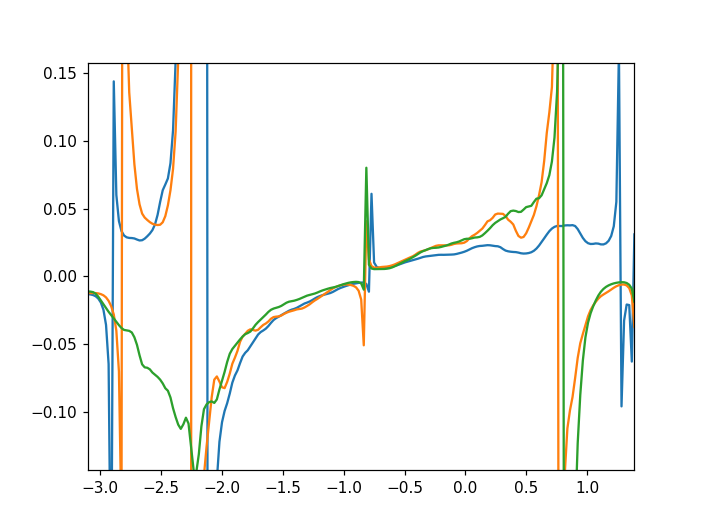

In [312]:
vbg = np.linspace(-3.5, 2, 261)
filtn = 1
drxy1 = gaussian_filter((data47.a865X[:] - data48.a865X[:])/10e-9, filtn)
drxy2 = gaussian_filter((data47.a830X[:] - data48.a830X[:])/10e-9, filtn)
drxy3 = gaussian_filter((data47.a830_2X[:] - data48.a830_2X[:])/10e-9, filtn)
plt.figure()
plt.plot(vbg, 1/drxy1)
plt.plot(vbg, 1/drxy2)
plt.plot(vbg, 1/drxy3)

## Reconnect to the previous configuration:

lockin865: 35-34  
lockin830: 34-33  
lockin830_2: 40-41

In [313]:
lockin865.amplitude(0.5) # 5 nA

Define a high-D sweep param that keeps a constant D field while changing density

In [330]:
zfieldslope = 0.6629105490080421
b = zfieldslope*3.5
print(b)

2.3201869215281476


In [331]:
del highDparam

In [105]:
zfieldslope = 0.6629105490080421
def highDsweep(vbg):
    """Defined with vbg as volt_p1, vtg as volt_p5. Just enter the back gate voltage. The main range 
    of the flat bands is around -5 to 0.5 Vbg"""
    srframe.volt_p1(vbg)
    srframe.volt_p5(zfieldslope*vbg + 2.3201869215281476)
    
highDparam = qc.Parameter('highDparam', set_cmd=highDsweep, label='Vbg', unit='V')

In [316]:
lockin830.sensitivity(200e-6)
lockin830_2.sensitivity(200e-6)

In [326]:
srframe.close()

In [327]:
npd.instrumentinitialize.triton_instrs('srframe')

Connected to: Stanford_Research_Systems SIM900 (serial:s/n152150, firmware:ver3.6) in 0.75s


In [321]:
srframe.volt_p1()

-5.0

In [322]:
srframe.volt_p5()

-5.635

In [338]:
highDparam(-5.5)

In [339]:
srframe.volt_p5()

-1.326

In [340]:
lockin865.amplitude(0.2)

In [341]:
bgvals = np.linspace(-5.5, 0, 111)
data49, plot49 = npd.single_param_sweep(highDparam, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_2nA_0T_sweep_4K', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-15 01:10:36
DataSet:
   location = 'data/2020-09-15/#001_S3_865_35-34_830_34-33_8302_40-41_2nA_0T_sweep_4K_01-10-35'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | highDparam_set | highDparam   | (111,)
   Measured | lockin865_X    | X            | (111,)
   Measured | lockin865_Y    | Y            | (111,)
   Measured | lockin830_X    | X            | (111,)
   Measured | lockin830_Y    | Y            | (111,)
   Measured | lockin830_2_X  | X            | (111,)
   Measured | lockin830_2_Y  | Y            | (111,)
Finished at 2020-09-15 01:13:07


In [342]:
triton.condense()

In [343]:
triton.pid_mode(0)

In [358]:
triton.read_temps()

MC - on:  0.0260788 K
MC_cernox - on:  321.181 K
still - on:  0.691088 K
cold_plate - off:  0.117058 K
magnet - off:  4.07175 K
PT2h - off:  3.29344 K
PT2p - off:  3.53427 K
PT1h - off:  48.3983 K
PT1p - off:  64.6212 K


In [359]:
triton.read_pressures()

P1:  -0.564518
P2:  312.315
P3:  0.0442
P4:  0.814
P5:  60.3991
POVC:  0.0003


In [360]:
bgvals = np.linspace(-5.5, 0.5, 121)
data50, plot50 = npd.single_param_sweep(highDparam, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_2nA_0T_sweep_baseT', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-15 08:59:57
DataSet:
   location = 'data/2020-09-15/#002_S3_865_35-34_830_34-33_8302_40-41_2nA_0T_sweep_baseT_08-59-55'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | highDparam_set | highDparam   | (121,)
   Measured | lockin865_X    | X            | (121,)
   Measured | lockin865_Y    | Y            | (121,)
   Measured | lockin830_X    | X            | (121,)
   Measured | lockin830_Y    | Y            | (121,)
   Measured | lockin830_2_X  | X            | (121,)
   Measured | lockin830_2_Y  | Y            | (121,)
Finished at 2020-09-15 09:02:53


In [361]:
triton.magnet_POC(0)
triton.magnet_swh(1)

Wait 5 min for the switch to warm


In [362]:
bgvals = np.linspace(-5.5, 0.5, 481) # note that the temperature and magnet diagnostics cables are plugged in here
Bvals = np.linspace(0, 6, 61)
data51, plot51 = npd.twod_param_sweep(triton.field_set_stable, Bvals, highDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_2nA_0to6ThighD_baseT', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-15 09:20:25
DataSet:
   location = 'data/2020-09-15/#003_S3_865_35-34_830_34-33_8302_40-41_2nA_0to6ThighD_baseT_09-20-23'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (61,)
   Setpoint | highDparam_set              | highDparam       | (61, 481)
   Measured | lockin865_X                 | X                | (61, 481)
   Measured | lockin865_Y                 | Y                | (61, 481)
   Measured | lockin830_X                 | X                | (61, 481)
   Measured | lockin830_Y                 | Y                | (61, 481)
   Measured | lockin830_2_X               | X                | (61, 481)
   Measured | lockin830_2_Y               | Y                | (61, 481)
Finished at 2020-09-15 21:17:08


In [363]:
triton.magnet_POC(1)

In [364]:
Bvals = np.concatenate((np.linspace(6.1, 7.9, 19), [7.998]))
data52, plot52 = npd.twod_param_sweep(triton.field_set_stable, Bvals, highDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_2nA_6p1to8ThighD_baseT', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-15 21:33:33
DataSet:
   location = 'data/2020-09-15/#004_S3_865_35-34_830_34-33_8302_40-41_2nA_6p1to8ThighD_baseT_21-33-31'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (20,)
   Setpoint | highDparam_set              | highDparam       | (20, 481)
   Measured | lockin865_X                 | X                | (20, 481)
   Measured | lockin865_Y                 | Y                | (20, 481)
   Measured | lockin830_X                 | X                | (20, 481)
   Measured | lockin830_Y                 | Y                | (20, 481)
   Measured | lockin830_2_X               | X                | (20, 481)
   Measured | lockin830_2_Y               | Y                | (20, 481)
Finished at 2020-09-16 06:19:57


In [365]:
triton.field_set_stable(0)

## Adding srframe port 7 voltage source to be used with the summing amplifier for cricital current measurements

And all sensor cables unplugged to get the lowest base temp possible

In [366]:
srframe.close()

In [367]:
lockin865.close()

In [368]:
lockin830.close()
lockin830_2.close()
triton.close()

In [369]:
k2182.close()

In [12]:
lockin865.amplitude(0.05) # 0.5 nA

In [18]:
zeroDparam(0)

In [20]:
lockin830.sensitivity(50e-6)
lockin830_2.sensitivity(10e-6)

In [21]:
# do a quick sweep at 0 D field
zeroDparam(-3.5)
time.sleep(20)
bgvals = np.linspace(-3.5, 2, 221)
data53, plot53 = npd.single_param_sweep(zeroDparam, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_0p5nA_0Dsweep_baseT')
zeroDparam(0)

Started at 2020-09-16 11:27:15
DataSet:
   location = 'data/2020-09-16/#002_S3_865_35-34_830_34-33_8302_40-41_0p5nA_0Dsweep_baseT_11-27-13'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (221,)
   Measured | lockin865_X    | X            | (221,)
   Measured | lockin865_Y    | Y            | (221,)
   Measured | lockin830_X    | X            | (221,)
   Measured | lockin830_Y    | Y            | (221,)
   Measured | lockin830_2_X  | X            | (221,)
   Measured | lockin830_2_Y  | Y            | (221,)
Finished at 2020-09-16 11:32:28


Do a gate-critical current sweep 0.1 to 1.1 V

In [22]:
lockin830.sensitivity(10e-6)
lockin830_2.sensitivity(10e-6)

In [23]:
Ivals = np.linspace(-10, 10, 101) #-100 to 100 nA
gvals = np.linspace(0.1, 1.1, 41)
data54, plot54 = npd.twod_param_sweep(zeroDparam, gvals, srframe.volt_p7, Ivals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=20, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_0p5nA_0Dsweep_baseT', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p7(0)
zeroDparam(0)

Started at 2020-09-16 11:41:47
DataSet:
   location = 'data/2020-09-16/#003_S3_865_35-34_830_34-33_8302_40-41_0p5nA_0Dsweep_baseT_11-41-46'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | zeroDparam_set      | zeroDparam   | (41,)
   Setpoint | srframe_volt_p7_set | volt_p7      | (41, 101)
   Measured | lockin865_X         | X            | (41, 101)
   Measured | lockin865_Y         | Y            | (41, 101)
   Measured | lockin830_X         | X            | (41, 101)
   Measured | lockin830_Y         | Y            | (41, 101)
   Measured | lockin830_2_X       | X            | (41, 101)
   Measured | lockin830_2_Y       | Y            | (41, 101)
Finished at 2020-09-16 13:30:59


<IPython.core.display.Javascript object>


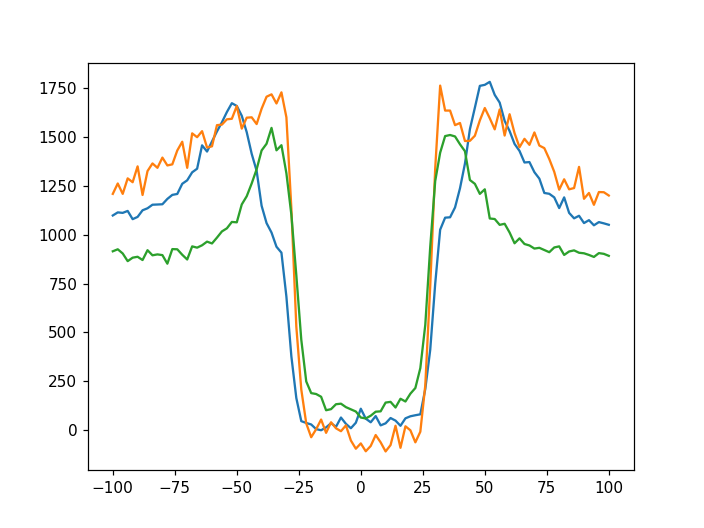

0.4


In [65]:
plt.figure()  # even though the coherence peaks may be higher on indx 20, this seems to be the most universally robust SC and the largest hard gap (0-resistance width)
indx = 12
print(gvals[indx])
plt.plot(Ivals*10, data54.lockin865_X[indx, :]/0.5e-9)
plt.plot(Ivals*10, data54.lockin830_X[indx, :]/0.5e-9)
plt.plot(Ivals*10, data54.lockin830_2_X[indx, :]/0.5e-9)

<IPython.core.display.Javascript object>


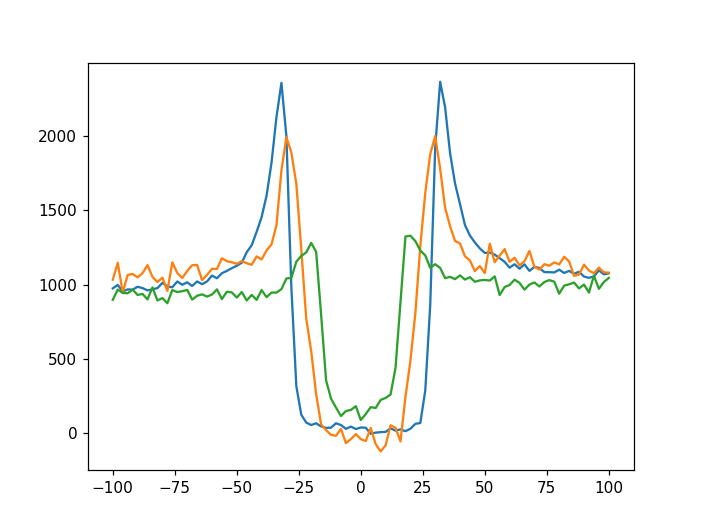

0.6


In [64]:
plt.figure()
indx = 20
print(gvals[indx])
plt.plot(Ivals*10, data54.lockin865_X[indx, :]/0.5e-9)
plt.plot(Ivals*10, data54.lockin830_X[indx, :]/0.5e-9)
plt.plot(Ivals*10, data54.lockin830_2_X[indx, :]/0.5e-9)

In [67]:
# backgate value, topgate value
print(gvals[12], gvals[12]*0.6629105490080421)

0.4 0.26516421960321684


## Fraunhofer like pattern (in-plane field though) at 0.4 vbg, zeroDparam (electron-side SC)

In [68]:
zeroDparam(0.4)

In [73]:
triton.magnet_POC(0)
triton.magnet_swh(1)

Wait 5 min for the switch to warm


In [75]:
Bvals = np.linspace(2.6, -2.6, 131)
Ivals = np.linspace(-10, 10, 201)
data55, plot55 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p7, Ivals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=20, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_0p5nA_0D_field_Ic_baseT_', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p7(0)
triton.field_set_stable(0)

Started at 2020-09-16 15:55:33
Are you sure you want to use the magnet? [y/n]: y
DataSet:
   location = 'data/2020-09-16/#004_S3_865_35-34_830_34-33_8302_40-41_0p5nA_0D_field_Ic_baseT__15-55-31'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (131,)
   Setpoint | srframe_volt_p7_set         | volt_p7          | (131, 201)
   Measured | lockin865_X                 | X                | (131, 201)
   Measured | lockin865_Y                 | Y                | (131, 201)
   Measured | lockin830_X                 | X                | (131, 201)
   Measured | lockin830_Y                 | Y                | (131, 201)
   Measured | lockin830_2_X               | X                | (131, 201)
   Measured | lockin830_2_Y               | Y                | (131, 201)
Finished at 2020-09-17 03:16:28


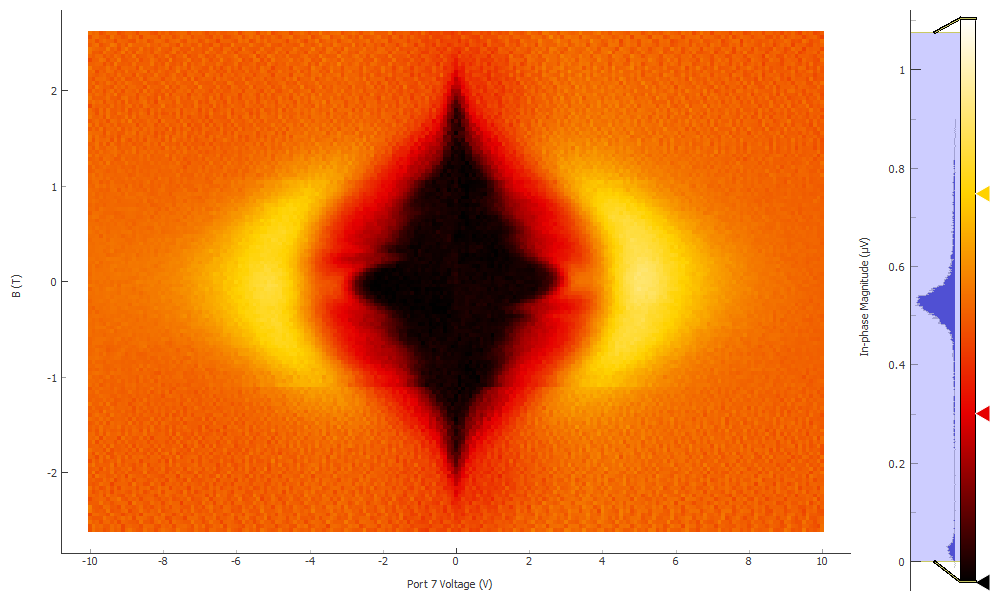

In [79]:
plot55[0]

### hole side

In [77]:
# hole side gate-Ic diagram
gvals = np.linspace(-2.6, -2, 61)
Ivals = np.linspace(-10, 10, 101)
data56, plot56 = npd.twod_param_sweep(zeroDparam, gvals, srframe.volt_p7, Ivals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=20, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_0p5nA_0D_gate_Ic_baseTholes', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p7(0)
zeroDparam(0)

Started at 2020-09-17 08:23:54
DataSet:
   location = 'data/2020-09-17/#001_S3_865_35-34_830_34-33_8302_40-41_0p5nA_0D_gate_Ic_baseTholes_08-23-52'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | zeroDparam_set      | zeroDparam   | (61,)
   Setpoint | srframe_volt_p7_set | volt_p7      | (61, 101)
   Measured | lockin865_X         | X            | (61, 101)
   Measured | lockin865_Y         | Y            | (61, 101)
   Measured | lockin830_X         | X            | (61, 101)
   Measured | lockin830_Y         | Y            | (61, 101)
   Measured | lockin830_2_X       | X            | (61, 101)
   Measured | lockin830_2_Y       | Y            | (61, 101)
Finished at 2020-09-17 10:52:28
Keyboard Interrupt


<IPython.core.display.Javascript object>


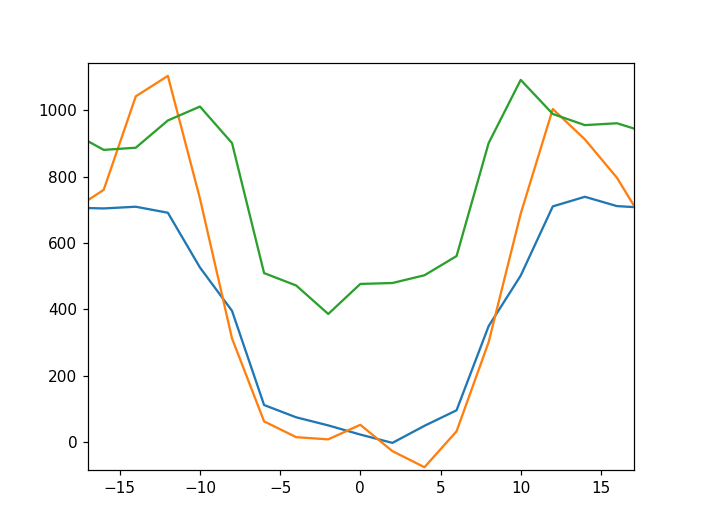

-2.42


(-40, 40)

In [92]:
plt.figure()
indx = 18
print(gvals[indx])
plt.plot(Ivals*10, data56.lockin865_X[indx, :]/0.5e-9)
# plt.plot(Ivals*10, data56.lockin865_X[indx-4, :]/0.5e-9)
plt.plot(Ivals*10, data56.lockin830_X[indx, :]/0.5e-9)
plt.plot(Ivals*10, data56.lockin830_2_X[indx, :]/0.5e-9)
plt.xlim(-40, 40)

In [93]:
#fraunhofer-like pattern at -2.42Vbg (zeroDparam)
0.6629105490080421*-2.42  # topgate value

-1.6042435285994618

In [95]:
lockin830.sensitivity(2e-6)
lockin830_2.sensitivity(2e-6)

In [100]:
lockin865.time_constant(0.3)
lockin865.filter_slope(12) # should be about 2s wait time. should reduce noise since this has overall less resistance change
lockin830.time_constant(0.3)
lockin830.filter_slope(12)
lockin830_2.time_constant(0.3)
lockin830_2.filter_slope(12)

In [99]:
zeroDparam(-2.42)

In [102]:
lockin865.amplitude()

0.04999999702

In [103]:
Ivals = np.linspace(-3, 3, 101)
Bvals = np.linspace(0.6, -0.6, 101)
data57, plot57 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p7, Ivals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=20, SetDelay2=2.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_0p5nA_0D_field_Ic_baseT_holes', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p7(0)
zeroDparam(0)

Started at 2020-09-17 11:11:05
DataSet:
   location = 'data/2020-09-17/#002_S3_865_35-34_830_34-33_8302_40-41_0p5nA_0D_field_Ic_baseT_holes_11-11-03'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (101,)
   Setpoint | srframe_volt_p7_set         | volt_p7          | (101, 101)
   Measured | lockin865_X                 | X                | (101, 101)
   Measured | lockin865_Y                 | Y                | (101, 101)
   Measured | lockin830_X                 | X                | (101, 101)
   Measured | lockin830_Y                 | Y                | (101, 101)
   Measured | lockin830_2_X               | X                | (101, 101)
   Measured | lockin830_2_Y               | Y                | (101, 101)
Finished at 2020-09-17 18:36:48


In [104]:
triton.field_set_stable(0)

## High D field Ic-gate and Ic-field graphs

In [106]:
highDparam(-1.6)

In [107]:
lockin830.sensitivity(5e-6)
lockin830_2.sensitivity(5e-6)

In [108]:
lockin865.time_constant(0.1)
lockin865.filter_slope(24)
lockin830.time_constant(0.1)
lockin830.filter_slope(24)
lockin830_2.time_constant(0.1)
lockin830_2.filter_slope(24)

In [109]:
bgvals = np.linspace(-1.6, 0.6, 81)
Ivals = np.linspace(-8, 8, 101)
data58, plot58 = npd.twod_param_sweep(highDparam, bgvals, srframe.volt_p7, Ivals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=15, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_0p5nA_highD_gate_Ic_baseT', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p7(0)
zeroDparam(0)

Started at 2020-09-17 18:40:11
DataSet:
   location = 'data/2020-09-17/#003_S3_865_35-34_830_34-33_8302_40-41_0p5nA_highD_gate_Ic_baseT_18-40-09'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | highDparam_set      | highDparam   | (81,)
   Setpoint | srframe_volt_p7_set | volt_p7      | (81, 101)
   Measured | lockin865_X         | X            | (81, 101)
   Measured | lockin865_Y         | Y            | (81, 101)
   Measured | lockin830_X         | X            | (81, 101)
   Measured | lockin830_Y         | Y            | (81, 101)
   Measured | lockin830_2_X       | X            | (81, 101)
   Measured | lockin830_2_Y       | Y            | (81, 101)
Finished at 2020-09-17 20:12:39
Keyboard Interrupt


<IPython.core.display.Javascript object>


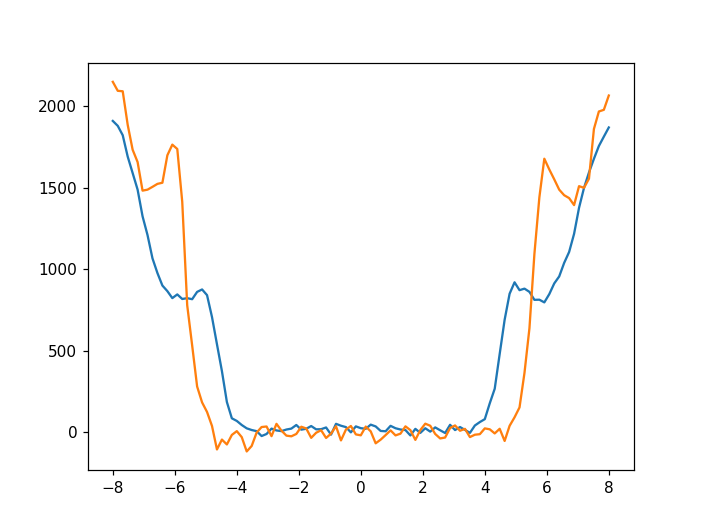

-1.3800000000000001


In [124]:
plt.figure()
indx = 8
print(bgvals[indx])
plt.plot(Ivals, data58.lockin865_X[indx, :]/0.5e-9)
plt.plot(Ivals, data58.lockin830_X[indx, :]/0.5e-9)
# plt.plot(Ivals, data58.lockin830_2_X[indx, :]/0.5e-9)

In [161]:
# best critical current at -1.38Vbg
0.6629105490080421*-1.38 + 2.3201869215281476  # topgate

1.4053703638970496

In [ ]:
the one above is fine, right?yes it was just several mins ago you paste you went in the middle of -4.16Oh, ok. Thanks

In [148]:
# hole side gate-Ic diagram
bgvals = np.linspace(-4.3, -3.65, 66)
Ivals = np.linspace(-5, 5, 101)
data59, plot59 = npd.twod_param_sweep(highDparam, bgvals, srframe.volt_p7, Ivals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=15, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_0p5nA_highD_gate_Ic_hole_baseT', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p7(0)
zeroDparam(0)

Started at 2020-09-17 20:28:39
DataSet:
   location = 'data/2020-09-17/#004_S3_865_35-34_830_34-33_8302_40-41_0p5nA_highD_gate_Ic_hole_baseT_20-28-37'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | highDparam_set      | highDparam   | (66,)
   Setpoint | srframe_volt_p7_set | volt_p7      | (66, 101)
   Measured | lockin865_X         | X            | (66, 101)
   Measured | lockin865_Y         | Y            | (66, 101)
   Measured | lockin830_X         | X            | (66, 101)
   Measured | lockin830_Y         | Y            | (66, 101)
   Measured | lockin830_2_X       | X            | (66, 101)
   Measured | lockin830_2_Y       | Y            | (66, 101)
Finished at 2020-09-17 23:10:43


<IPython.core.display.Javascript object>


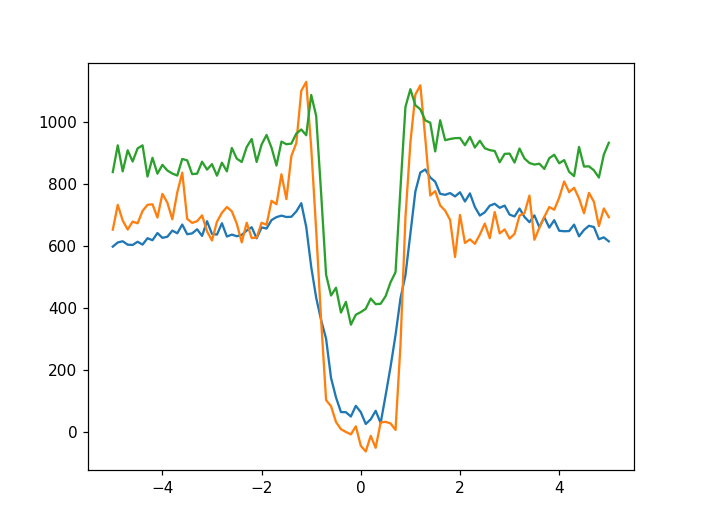

-4.16


In [158]:
plt.figure()
indx = 14
print(bgvals[indx])
plt.plot(Ivals, data59.lockin865_X[indx, :]/0.5e-9)
plt.plot(Ivals, data59.lockin830_X[indx, :]/0.5e-9)
plt.plot(Ivals, data59.lockin830_2_X[indx, :]/0.5e-9)

In [162]:
#optimized at about -4.16 Vbg and
0.6629105490080421*-4.16 + 2.3201869215281476 # topgate

-0.4375209623453076

In [ ]:
you had a typo above i fixed it there? you had the 6 in -4.16 went to the end of 2.320....

In [ ]:
this topgate you need to add the constant b? Oh yeah since it's higher field. good point

# Vary the gate while in the optimum SC region (same density, just chaning D), on the electron side

In [163]:
def elecSC(vbg):
    # The range is approximately -3.7 to 5 Vbg
    srframe.volt_p1(vbg)
    srframe.volt_p5(vbg*-0.6629105490080421 + 0.4905538062659516) #topgate

elecSCparam = qc.Parameter('elecSCparam', set_cmd=elecSC, label='Vbg', unit='V')

In [164]:
elecSCparam(-1.38)

In [169]:
srframe.volt_p1()

-1.38

In [170]:
srframe.volt_p5()

1.405

In [172]:
bgvals = np.linspace(-3.7, 5, 88)
Ivals = np.linspace(-9, 9, 181)
data60, plot60 = npd.twod_param_sweep(elecSCparam, bgvals, srframe.volt_p7, Ivals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=15, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_0p5nA_gate_Ic_elecSC_baseT', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p7(0)
zeroDparam(0)

Started at 2020-09-17 23:53:53
DataSet:
   location = 'data/2020-09-17/#005_S3_865_35-34_830_34-33_8302_40-41_0p5nA_gate_Ic_elecSC_baseT_23-53-52'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | elecSCparam_set     | elecSCparam  | (88,)
   Setpoint | srframe_volt_p7_set | volt_p7      | (88, 181)
   Measured | lockin865_X         | X            | (88, 181)
   Measured | lockin865_Y         | Y            | (88, 181)
   Measured | lockin830_X         | X            | (88, 181)
   Measured | lockin830_Y         | Y            | (88, 181)
   Measured | lockin830_2_X       | X            | (88, 181)
   Measured | lockin830_2_Y       | Y            | (88, 181)
Finished at 2020-09-18 06:08:57


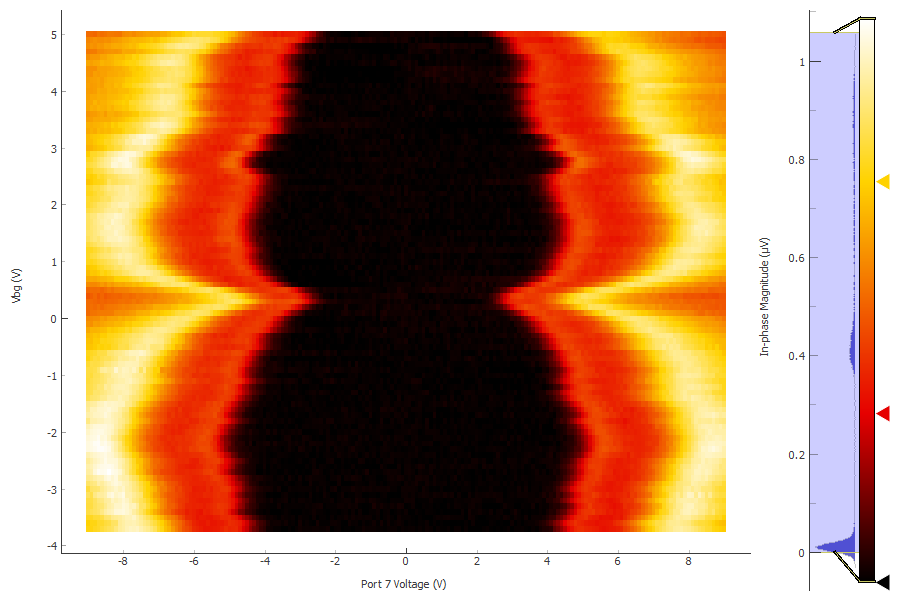

In [178]:
plot60[0]

## Hole side Ic vs. D plot

In [173]:
def holeSC(vbg):
    # The range is approximately -5.6 to 3 Vbg
    srframe.volt_p1(vbg)
    srframe.volt_p5(vbg*-0.6629105490080421 + -3.195228846218763) #topgate

holeSCparam = qc.Parameter('holeSCparam', set_cmd=holeSC, label='Vbg', unit='V')

In [177]:
bgvals = np.linspace(-5.6, 3, 87)
Ivals = np.linspace(-3, 3, 121)
data61, plot61 = npd.twod_param_sweep(holeSCparam, bgvals, srframe.volt_p7, Ivals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=15, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_0p5nA_gate_Ic_holeSC_baseT', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p7(0)
zeroDparam(0)

Started at 2020-09-18 08:37:07
DataSet:
   location = 'data/2020-09-18/#002_S3_865_35-34_830_34-33_8302_40-41_0p5nA_gate_Ic_holeSC_baseT_08-37-05'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | holeSCparam_set     | holeSCparam  | (87,)
   Setpoint | srframe_volt_p7_set | volt_p7      | (87, 121)
   Measured | lockin865_X         | X            | (87, 121)
   Measured | lockin865_Y         | Y            | (87, 121)
   Measured | lockin830_X         | X            | (87, 121)
   Measured | lockin830_Y         | Y            | (87, 121)
   Measured | lockin830_2_X       | X            | (87, 121)
   Measured | lockin830_2_Y       | Y            | (87, 121)
Finished at 2020-09-18 12:42:22


# Electron side higher D B-field dependence

In [179]:
highDparam(-1.38) # electron side maximum, high D

In [180]:
Bvals = np.linspace(3, -3, 101)
Ivals = np.linspace(-9, 9, 181)
data62, plot62 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p7, Ivals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=20, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_0p5nA_highD_field_Ic_baseT', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p7(0)
zeroDparam(0)
triton.field_set_stable(0)

Started at 2020-09-18 12:42:46
DataSet:
   location = 'data/2020-09-18/#003_S3_865_35-34_830_34-33_8302_40-41_0p5nA_highD_field_Ic_baseT_12-42-44'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (101,)
   Setpoint | srframe_volt_p7_set         | volt_p7          | (101, 181)
   Measured | lockin865_X                 | X                | (101, 181)
   Measured | lockin865_Y                 | Y                | (101, 181)
   Measured | lockin830_X                 | X                | (101, 181)
   Measured | lockin830_Y                 | Y                | (101, 181)
   Measured | lockin830_2_X               | X                | (101, 181)
   Measured | lockin830_2_Y               | Y                | (101, 181)
Finished at 2020-09-18 20:58:22


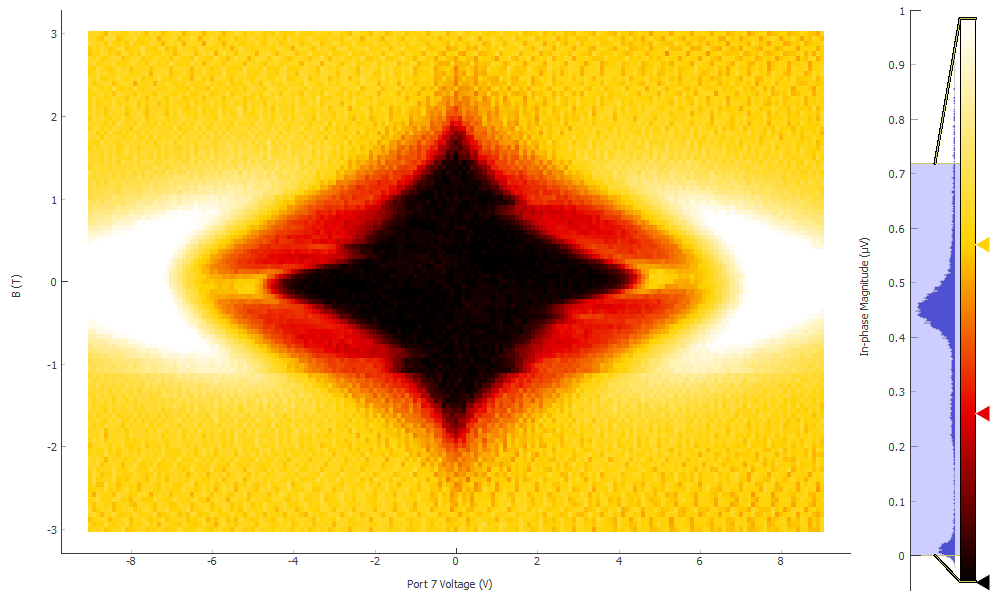

In [181]:
plot62[0]

Do a quick sweep in the opposite direction (in offset current) to check if that's what's causing the offsets

In [182]:
highDparam(-1.38) # electron side maximum, high D

In [183]:
Bvals = np.linspace(3, -3, 81)
Ivals = np.linspace(9, -9, 121)
data63, plot63 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p7, Ivals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=20, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_0p5nA_highD_field_Ic_baseT_oppositeIdirection', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p7(0)
zeroDparam(0)
triton.field_set_stable(0)

Started at 2020-09-18 21:13:29
DataSet:
   location = 'data/2020-09-18/#004_S3_865_35-34_830_34-33_8302_40-41_0p5nA_highD_field_Ic_baseT_oppositeIdirection_21-13-27'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (81,)
   Setpoint | srframe_volt_p7_set         | volt_p7          | (81, 121)
   Measured | lockin865_X                 | X                | (81, 121)
   Measured | lockin865_Y                 | Y                | (81, 121)
   Measured | lockin830_X                 | X                | (81, 121)
   Measured | lockin830_Y                 | Y                | (81, 121)
   Measured | lockin830_2_X               | X                | (81, 121)
   Measured | lockin830_2_Y               | Y                | (81, 121)
Finished at 2020-09-19 02:18:50


Then try a different electron-side SC density to see if the results are similar across the range

In [186]:
def elecSC_2(vbg):
    # The range is approximately -3.7 to 5 Vbg, similar to the last sweep
    srframe.volt_p1(vbg)
    srframe.volt_p5(vbg*-0.6629105490080421 + 0.72920160390884656) #topgate

elecSCparam_2 = qc.Parameter('elecSCparam_2', set_cmd=elecSC_2, label='Vbg', unit='V')

In [187]:
bgvals = np.linspace(-3.7, 5, 88)
Ivals = np.linspace(-9, 9, 181)
data64, plot64 = npd.twod_param_sweep(elecSCparam_2, bgvals, srframe.volt_p7, Ivals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=15, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_0p5nA_gate_Ic_elecSCyellowline_baseT', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p7(0)
zeroDparam(0)

Started at 2020-09-19 09:41:42
DataSet:
   location = 'data/2020-09-19/#002_S3_865_35-34_830_34-33_8302_40-41_0p5nA_gate_Ic_elecSCyellowline_baseT_09-41-40'
   <Type>   | <array_id>          | <array.name>  | <array.shape>
   Setpoint | elecSCparam_2_set   | elecSCparam_2 | (88,)
   Setpoint | srframe_volt_p7_set | volt_p7       | (88, 181)
   Measured | lockin865_X         | X             | (88, 181)
   Measured | lockin865_Y         | Y             | (88, 181)
   Measured | lockin830_X         | X             | (88, 181)
   Measured | lockin830_Y         | Y             | (88, 181)
   Measured | lockin830_2_X       | X             | (88, 181)
   Measured | lockin830_2_Y       | Y             | (88, 181)
Finished at 2020-09-19 15:52:10


Then maybe T dependence of higher D to get the critical temperature

# T dependence for High D field

In [189]:
lockin865.amplitude(0.1)

In [191]:
#lockin865 sensitivity 50uV, 830 50uV, 830_2 10uV

In [190]:
highDparam(-5.5)#test
time.sleep(30)
bgvals = np.linspace(-5.5, 0.5, 241)
data65, plot65 = npd.single_param_sweep(highDparam, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_0T_sweep_baseT', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-19 16:15:59
DataSet:
   location = 'data/2020-09-19/#003_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_sweep_baseT_16-15-58'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | highDparam_set | highDparam   | (241,)
   Measured | lockin865_X    | X            | (241,)
   Measured | lockin865_Y    | Y            | (241,)
   Measured | lockin830_X    | X            | (241,)
   Measured | lockin830_Y    | Y            | (241,)
   Measured | lockin830_2_X  | X            | (241,)
   Measured | lockin830_2_Y  | Y            | (241,)
Finished at 2020-09-19 16:21:25


In [192]:
highDparam(0.2)#sensor disconnected, 1nA
time.sleep(25)
bgvals = np.linspace(0.2, -5.3, 551)
data66, plot66 = npd.single_param_sweep(highDparam, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_0T_HighD_sweep_baseT', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-19 16:29:43
DataSet:
   location = 'data/2020-09-19/#004_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_HighD_sweep_baseT_16-29-42'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | highDparam_set | highDparam   | (551,)
   Measured | lockin865_X    | X            | (551,)
   Measured | lockin865_Y    | Y            | (551,)
   Measured | lockin830_X    | X            | (551,)
   Measured | lockin830_Y    | Y            | (551,)
   Measured | lockin830_2_X  | X            | (551,)
   Measured | lockin830_2_Y  | Y            | (551,)
Finished at 2020-09-19 16:42:08


In [199]:
triton.pid_range(10)

In [194]:
triton.pid_setpoint(0.05)

In [198]:
triton.pid_mode(1)

In [201]:
highDparam(0.2)
time.sleep(25)
Tvals = np.linspace(0.05, 1, 20)
bgvals = np.linspace(0.2, -5.3, 551)
data67, plot67 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, highDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_HighD_gateTsweepto1K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-19 16:51:33
DataSet:
   location = 'data/2020-09-19/#005_S3_865_35-34_830_34-33_8302_40-41_1nA_HighD_gateTsweepto1K_16-51-31'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (20,)
   Setpoint | highDparam_set          | highDparam   | (20, 551)
   Measured | lockin865_X             | X            | (20, 551)
   Measured | lockin865_Y             | Y            | (20, 551)
   Measured | lockin830_X             | X            | (20, 551)
   Measured | lockin830_Y             | Y            | (20, 551)
   Measured | lockin830_2_X           | X            | (20, 551)
   Measured | lockin830_2_Y           | Y            | (20, 551)
Finished at 2020-09-19 21:55:05


In [202]:
triton.pid_range(31.6)

In [203]:
time.sleep(10)

In [204]:
triton.pid_setpoint(1.05)

In [205]:
highDparam(0.2)
time.sleep(25)
Tvals = np.linspace(1.05, 1.4, 8)
bgvals = np.linspace(0.2, -5.3, 551)
data68, plot68 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, highDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_HighD_gateTsweep1p05to1p4K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-19 21:55:53
DataSet:
   location = 'data/2020-09-19/#006_S3_865_35-34_830_34-33_8302_40-41_1nA_HighD_gateTsweep1p05to1p4K_21-55-51'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (8,)
   Setpoint | highDparam_set          | highDparam   | (8, 551)
   Measured | lockin865_X             | X            | (8, 551)
   Measured | lockin865_Y             | Y            | (8, 551)
   Measured | lockin830_X             | X            | (8, 551)
   Measured | lockin830_Y             | Y            | (8, 551)
   Measured | lockin830_2_X           | X            | (8, 551)
   Measured | lockin830_2_Y           | Y            | (8, 551)
Finished at 2020-09-19 23:57:08


In [206]:
triton.pid_range(100)

In [207]:
time.sleep(10)

In [208]:
triton.pid_setpoint(1.45)

In [209]:
highDparam(0.2)
time.sleep(25)
Tvals = np.linspace(1.45, 2, 12)
bgvals = np.linspace(0.2, -5.3, 551)
data69, plot69 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, highDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_HighD_gateTsweep1p45to2K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-19 23:57:56
DataSet:
   location = 'data/2020-09-19/#007_S3_865_35-34_830_34-33_8302_40-41_1nA_HighD_gateTsweep1p45to2K_23-57-54'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (12,)
   Setpoint | highDparam_set          | highDparam   | (12, 551)
   Measured | lockin865_X             | X            | (12, 551)
   Measured | lockin865_Y             | Y            | (12, 551)
   Measured | lockin830_X             | X            | (12, 551)
   Measured | lockin830_Y             | Y            | (12, 551)
   Measured | lockin830_2_X           | X            | (12, 551)
   Measured | lockin830_2_Y           | Y            | (12, 551)
Finished at 2020-09-20 03:00:03


In [210]:
triton.pid_setpoint(2.1)

In [211]:
highDparam(0.2)
time.sleep(25)
Tvals = np.linspace(2.1, 10, 80)
bgvals = np.linspace(0.2, -5.3, 551)
data70, plot70 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, highDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_HighD_gateTsweep2p1to10K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-20 09:42:12
DataSet:
   location = 'data/2020-09-20/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_HighD_gateTsweep2p1to10K_09-42-10'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (80,)
   Setpoint | highDparam_set          | highDparam   | (80, 551)
   Measured | lockin865_X             | X            | (80, 551)
   Measured | lockin865_Y             | Y            | (80, 551)
   Measured | lockin830_X             | X            | (80, 551)
   Measured | lockin830_Y             | Y            | (80, 551)
   Measured | lockin830_2_X           | X            | (80, 551)
   Measured | lockin830_2_Y           | Y            | (80, 551)
Finished at 2020-09-21 06:00:14


In [212]:
triton.pid_setpoint(10.5)

In [213]:
highDparam(0.2)
time.sleep(25)
Tvals = np.linspace(10.5, 30, 40)
bgvals = np.linspace(0.2, -5.3, 551)
data71, plot71 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, highDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=240, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_HighD_gateTsweep10p5to30K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-21 06:00:53
DataSet:
   location = 'data/2020-09-21/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_HighD_gateTsweep10p5to30K_06-00-51'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (40,)
   Setpoint | highDparam_set          | highDparam   | (40, 551)
   Measured | lockin865_X             | X            | (40, 551)
   Measured | lockin865_Y             | Y            | (40, 551)
   Measured | lockin830_X             | X            | (40, 551)
   Measured | lockin830_Y             | Y            | (40, 551)
   Measured | lockin830_2_X           | X            | (40, 551)
   Measured | lockin830_2_Y           | Y            | (40, 551)
Finished at 2020-09-21 16:47:11


In [214]:
triton.write('SET:DEV:V1:VALV:SIG:STATE:CLOSE')

In [215]:
time.sleep(60)

In [216]:
triton.pid_setpoint(30.5)

In [217]:
highDparam(0.2)
time.sleep(25)
Tvals = np.linspace(30.5, 40, 20)
bgvals = np.linspace(0.2, -5.3, 551)
data72, plot72 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, highDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=420, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_HighD_gateTsweep30p5to40K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-21 16:48:49
DataSet:
   location = 'data/2020-09-21/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_HighD_gateTsweep30p5to40K_16-48-47'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (20,)
   Setpoint | highDparam_set          | highDparam   | (20, 551)
   Measured | lockin865_X             | X            | (20, 551)
   Measured | lockin865_Y             | Y            | (20, 551)
   Measured | lockin830_X             | X            | (20, 551)
   Measured | lockin830_Y             | Y            | (20, 551)
   Measured | lockin830_2_X           | X            | (20, 551)
   Measured | lockin830_2_Y           | Y            | (20, 551)
Finished at 2020-09-21 23:12:15


In [218]:
lockin865.amplitude(0)
time.sleep(5)

In [219]:
triton.pid_mode(0)
time.sleep(10)

In [220]:
triton.alltempsenable()
time.sleep(20)

In [222]:
triton.fullcooldown()

In [236]:
triton.ask('READ:SYS:DR:ACTN')

'STAT:SYS:DR:ACTN:PCL'

In [239]:
triton.read_temps()

MC - on:  0.0243777 K
MC_cernox - on:  321.181 K
still - on:  0.71695 K
cold_plate - on:  0.0631992 K
magnet - on:  4.07175 K
PT2h - on:  3.30879 K
PT2p - on:  3.50455 K
PT1h - on:  46.8307 K
PT1p - on:  61.4747 K


In [240]:
#sensor disconnected

In [241]:
lockin865.amplitude(0.1)

In [242]:
def lowD_sweep(vbg):
    # The range is approximately -0.5 to 5 Vbg
    srframe.volt_p1(vbg)
    srframe.volt_p5(0.6629105490080421*vbg - 4.5) #topgate

lowD_param = qc.Parameter('lowD_param', set_cmd=lowD_sweep, label='Vbg', unit='V')

In [243]:
lowD_param(0)

In [256]:
zeroDparam(0)

# low D field T dependence

In [257]:
lowD_param(0)

In [259]:
lowD_param(0)#test
time.sleep(30)
bgvals = np.linspace(0, 5.5, 251)
data73, plot73 = npd.single_param_sweep(lowD_param, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_0T_sweep_baseT', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-22 14:01:41
DataSet:
   location = 'data/2020-09-22/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_sweep_baseT_14-01-40'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | lowD_param_set | lowD_param   | (251,)
   Measured | lockin865_X    | X            | (251,)
   Measured | lockin865_Y    | Y            | (251,)
   Measured | lockin830_X    | X            | (251,)
   Measured | lockin830_Y    | Y            | (251,)
   Measured | lockin830_2_X  | X            | (251,)
   Measured | lockin830_2_Y  | Y            | (251,)
Finished at 2020-09-22 14:07:21


In [260]:
lowD_param(-0.2)#sensor disconnected, 1nA
time.sleep(25)
bgvals = np.linspace(-0.2, 5.3, 551)
data74, plot74 = npd.single_param_sweep(lowD_param, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_0T_lowD_baseT', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-22 14:11:40
DataSet:
   location = 'data/2020-09-22/#003_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_lowD_baseT_14-11-39'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | lowD_param_set | lowD_param   | (551,)
   Measured | lockin865_X    | X            | (551,)
   Measured | lockin865_Y    | Y            | (551,)
   Measured | lockin830_X    | X            | (551,)
   Measured | lockin830_Y    | Y            | (551,)
   Measured | lockin830_2_X  | X            | (551,)
   Measured | lockin830_2_Y  | Y            | (551,)
Finished at 2020-09-22 14:24:05


In [269]:
triton.pid_range(10)

In [270]:
triton.pid_setpoint(0.05)

In [265]:
triton.pid_mode(1)

In [271]:
lowD_param(-0.2)
time.sleep(25)
Tvals = np.linspace(0.05, 1, 20)
bgvals = np.linspace(-0.2, 5.3, 551)
data75, plot75 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, lowD_param, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_lowD_gateTsweepto1K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-22 17:52:23
DataSet:
   location = 'data/2020-09-22/#006_S3_865_35-34_830_34-33_8302_40-41_1nA_lowD_gateTsweepto1K_17-52-21'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (20,)
   Setpoint | lowD_param_set          | lowD_param   | (20, 551)
   Measured | lockin865_X             | X            | (20, 551)
   Measured | lockin865_Y             | Y            | (20, 551)
   Measured | lockin830_X             | X            | (20, 551)
   Measured | lockin830_Y             | Y            | (20, 551)
   Measured | lockin830_2_X           | X            | (20, 551)
   Measured | lockin830_2_Y           | Y            | (20, 551)
Finished at 2020-09-22 22:55:24


In [272]:
triton.pid_range(31.6)

In [273]:
triton.pid_setpoint(1.05)

In [274]:
lowD_param(-0.2)
time.sleep(25)
Tvals = np.linspace(1.05, 1.4, 8)
bgvals = np.linspace(-0.2, 5.3, 551)
data76, plot76 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, lowD_param, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_lowD_gateTsweep1p05to1p4K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-22 22:56:10
DataSet:
   location = 'data/2020-09-22/#007_S3_865_35-34_830_34-33_8302_40-41_1nA_lowD_gateTsweep1p05to1p4K_22-56-08'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (8,)
   Setpoint | lowD_param_set          | lowD_param   | (8, 551)
   Measured | lockin865_X             | X            | (8, 551)
   Measured | lockin865_Y             | Y            | (8, 551)
   Measured | lockin830_X             | X            | (8, 551)
   Measured | lockin830_Y             | Y            | (8, 551)
   Measured | lockin830_2_X           | X            | (8, 551)
   Measured | lockin830_2_Y           | Y            | (8, 551)
Finished at 2020-09-23 00:57:24


In [275]:
triton.pid_range(100)

In [276]:
triton.pid_setpoint(1.45)

In [277]:
lowD_param(-0.2)
time.sleep(25)
Tvals = np.linspace(1.45, 2, 12)
bgvals = np.linspace(-0.2, 5.3, 551)
data77, plot77 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, lowD_param, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_lowD_gateTsweep1p45to2K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-23 00:58:10
DataSet:
   location = 'data/2020-09-23/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_lowD_gateTsweep1p45to2K_00-58-08'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (12,)
   Setpoint | lowD_param_set          | lowD_param   | (12, 551)
   Measured | lockin865_X             | X            | (12, 551)
   Measured | lockin865_Y             | Y            | (12, 551)
   Measured | lockin830_X             | X            | (12, 551)
   Measured | lockin830_Y             | Y            | (12, 551)
   Measured | lockin830_2_X           | X            | (12, 551)
   Measured | lockin830_2_Y           | Y            | (12, 551)
Finished at 2020-09-23 04:00:07


In [278]:
triton.pid_setpoint(2.1)

In [ ]:
#go to highT for full filling gap

In [279]:
lowD_param(-0.2)
time.sleep(25)
Tvals = np.linspace(2.1, 10, 80)
bgvals = np.linspace(-0.2, 5.3, 551)
data78, plot78 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, lowD_param, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_lowD_gateTsweep2p1to10K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-23 09:53:21
DataSet:
   location = 'data/2020-09-23/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_lowD_gateTsweep2p1to10K_09-53-19'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (80,)
   Setpoint | lowD_param_set          | lowD_param   | (80, 551)
   Measured | lockin865_X             | X            | (80, 551)
   Measured | lockin865_Y             | Y            | (80, 551)
   Measured | lockin830_X             | X            | (80, 551)
   Measured | lockin830_Y             | Y            | (80, 551)
   Measured | lockin830_2_X           | X            | (80, 551)
   Measured | lockin830_2_Y           | Y            | (80, 551)
Finished at 2020-09-24 06:11:35


In [280]:
lowD_param(-0.2)
time.sleep(25)
Tvals = np.linspace(10.5, 30, 40)
bgvals = np.linspace(-0.2, 5.3, 551)
data79, plot79 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, lowD_param, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=240, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_lowD_gateTsweep10p5to30K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-24 06:12:21
DataSet:
   location = 'data/2020-09-24/#001_S3_865_35-34_830_34-33_8302_40-41_1nA_lowD_gateTsweep10p5to30K_06-12-19'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (40,)
   Setpoint | lowD_param_set          | lowD_param   | (40, 551)
   Measured | lockin865_X             | X            | (40, 551)
   Measured | lockin865_Y             | Y            | (40, 551)
   Measured | lockin830_X             | X            | (40, 551)
   Measured | lockin830_Y             | Y            | (40, 551)
   Measured | lockin830_2_X           | X            | (40, 551)
   Measured | lockin830_2_Y           | Y            | (40, 551)
Finished at 2020-09-24 16:58:49


In [281]:
triton.V1('CLOSE')

In [282]:
time.sleep(60)

In [283]:
lowD_param(-0.2)
time.sleep(25)
Tvals = np.linspace(30.5, 40, 20)
bgvals = np.linspace(-0.2, 5.3, 551)
data80, plot80 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, lowD_param, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=420, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_lowD_gateTsweep30p5to40K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-09-24 17:00:35
DataSet:
   location = 'data/2020-09-24/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_lowD_gateTsweep30p5to40K_17-00-33'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (20,)
   Setpoint | lowD_param_set          | lowD_param   | (20, 551)
   Measured | lockin865_X             | X            | (20, 551)
   Measured | lockin865_Y             | Y            | (20, 551)
   Measured | lockin830_X             | X            | (20, 551)
   Measured | lockin830_Y             | Y            | (20, 551)
   Measured | lockin830_2_X           | X            | (20, 551)
   Measured | lockin830_2_Y           | Y            | (20, 551)
Finished at 2020-09-24 23:24:03


In [284]:
lockin865.amplitude(0)
time.sleep(5)

In [285]:
triton.pid_mode(0)
time.sleep(10)

In [286]:
triton.alltempsenable()
time.sleep(20)

In [38]:
triton.fullcooldown()

In [294]:
triton.ask('READ:SYS:DR:ACTN')

'STAT:SYS:DR:ACTN:PCL'

In [300]:
triton.read_temps()

MC - on:  0.0253738 K
MC_cernox - on:  321.181 K
still - on:  0.715393 K
cold_plate - on:  0.0630876 K
magnet - on:  4.07175 K
PT2h - on:  3.26796 K
PT2p - on:  3.49036 K
PT1h - on:  46.8016 K
PT1p - on:  61.4881 K


In [295]:
triton.read_pumps()

Turbo: 0,  speed: 0.0 Hz
KNF: 1
Forepump: 0


In [348]:
triton.read_valves()

V1:  OPEN
V2:  CLOSE
V3:  CLOSE
V4:  CLOSE
V5:  OPEN
V6:  CLOSE
V7:  CLOSE
V8:  CLOSE
V9:  CLOSE


# now fix at in plane field 8T do T dependence around D0

In [307]:
lockin865.amplitude(0.3)

In [305]:
triton.field_set_stable(6)

In [306]:
triton.field_set_stable(7.998)

In [308]:
bgvals = np.linspace(-3.5, 2, 251)# test
zeroDparam(-3.5)
time.sleep(25)
data81, plot81 = npd.single_param_sweep(zeroDparam, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_3nA_8T_0Dsweep_baseT', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-25 12:49:33
DataSet:
   location = 'data/2020-09-25/#001_S3_865_35-34_830_34-33_8302_40-41_3nA_8T_0Dsweep_baseT_12-49-32'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (251,)
   Measured | lockin865_X    | X            | (251,)
   Measured | lockin865_Y    | Y            | (251,)
   Measured | lockin830_X    | X            | (251,)
   Measured | lockin830_Y    | Y            | (251,)
   Measured | lockin830_2_X  | X            | (251,)
   Measured | lockin830_2_Y  | Y            | (251,)
Finished at 2020-09-25 12:55:13


In [312]:
triton.pid_range(10)

In [310]:
triton.pid_setpoint(0.05)

In [311]:
triton.pid_mode(1)

In [313]:
zeroDparam(-3.5)
time.sleep(25)
Tvals = np.linspace(0.05, 1, 20)
bgvals = np.linspace(-3.5, 2, 551)
data82, plot82 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_3nA_D0_7p998T_gateTsweepto1K')
zeroDparam(0)

Started at 2020-09-25 13:02:36
DataSet:
   location = 'data/2020-09-25/#002_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_7p998T_gateTsweepto1K_13-02-32'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (20,)
   Setpoint | zeroDparam_set          | zeroDparam   | (20, 551)
   Measured | lockin865_X             | X            | (20, 551)
   Measured | lockin865_Y             | Y            | (20, 551)
   Measured | lockin830_X             | X            | (20, 551)
   Measured | lockin830_Y             | Y            | (20, 551)
   Measured | lockin830_2_X           | X            | (20, 551)
   Measured | lockin830_2_Y           | Y            | (20, 551)
Finished at 2020-09-25 18:06:33


In [314]:
triton.pid_range(31.6)
time.sleep(10)
triton.pid_setpoint(1.05)

In [315]:
zeroDparam(-3.5)
time.sleep(25)
Tvals = np.linspace(1.05, 1.4, 8)
bgvals = np.linspace(-3.5, 2, 551)
data83, plot83 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_3nA_D0_7p998T_gateTsweep1p05to1p4K')
zeroDparam(0)

Started at 2020-09-25 18:07:25
DataSet:
   location = 'data/2020-09-25/#003_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_7p998T_gateTsweep1p05to1p4K_18-07-21'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (8,)
   Setpoint | zeroDparam_set          | zeroDparam   | (8, 551)
   Measured | lockin865_X             | X            | (8, 551)
   Measured | lockin865_Y             | Y            | (8, 551)
   Measured | lockin830_X             | X            | (8, 551)
   Measured | lockin830_Y             | Y            | (8, 551)
   Measured | lockin830_2_X           | X            | (8, 551)
   Measured | lockin830_2_Y           | Y            | (8, 551)
Finished at 2020-09-25 20:08:27


In [316]:
triton.pid_range(100)
time.sleep(10)
triton.pid_setpoint(1.45)

In [317]:
zeroDparam(-3.5)
time.sleep(25)
Tvals = np.linspace(1.45, 2, 12)
bgvals = np.linspace(-3.5, 2, 551)
data84, plot84 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_3nA_D0_7p998T_gateTsweep1p45to2K')
zeroDparam(0)

Started at 2020-09-25 20:09:18
DataSet:
   location = 'data/2020-09-25/#004_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_7p998T_gateTsweep1p45to2K_20-09-15'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (12,)
   Setpoint | zeroDparam_set          | zeroDparam   | (12, 551)
   Measured | lockin865_X             | X            | (12, 551)
   Measured | lockin865_Y             | Y            | (12, 551)
   Measured | lockin830_X             | X            | (12, 551)
   Measured | lockin830_Y             | Y            | (12, 551)
   Measured | lockin830_2_X           | X            | (12, 551)
   Measured | lockin830_2_Y           | Y            | (12, 551)
Finished at 2020-09-25 23:11:29


In [318]:
triton.pid_setpoint(2.1)

In [319]:
zeroDparam(-3.5)
time.sleep(25)
Tvals = np.linspace(2.1, 10, 80)
bgvals = np.linspace(-3.5, 2, 551)
data85, plot85 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_3nA_D0_7p998T_gateTsweep2p1to10K')
zeroDparam(0)

Started at 2020-09-25 23:16:08
DataSet:
   location = 'data/2020-09-25/#005_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_7p998T_gateTsweep2p1to10K_23-16-04'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (80,)
   Setpoint | zeroDparam_set          | zeroDparam   | (80, 551)
   Measured | lockin865_X             | X            | (80, 551)
   Measured | lockin865_Y             | Y            | (80, 551)
   Measured | lockin830_X             | X            | (80, 551)
   Measured | lockin830_Y             | Y            | (80, 551)
   Measured | lockin830_2_X           | X            | (80, 551)
   Measured | lockin830_2_Y           | Y            | (80, 551)
Finished at 2020-09-26 19:29:36


In [320]:
triton.pid_setpoint(10.5)

In [321]:
zeroDparam(-3.5)
time.sleep(25)
Tvals = np.linspace(10.5, 25, 30)
bgvals = np.linspace(-3.5, 2, 551)
data86, plot86 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=300, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_3nA_D0_7p998T_gateTsweep10p5to25K')
zeroDparam(0)

Started at 2020-09-26 20:11:11
DataSet:
   location = 'data/2020-09-26/#001_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_7p998T_gateTsweep10p5to25K_20-11-07'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (30,)
   Setpoint | zeroDparam_set          | zeroDparam   | (30, 551)
   Measured | lockin865_X             | X            | (30, 551)
   Measured | lockin865_Y             | Y            | (30, 551)
   Measured | lockin830_X             | X            | (30, 551)
   Measured | lockin830_Y             | Y            | (30, 551)
   Measured | lockin830_2_X           | X            | (30, 551)
   Measured | lockin830_2_Y           | Y            | (30, 551)
Finished at 2020-09-27 04:49:25


In [35]:
lockin865.amplitude(0)
time.sleep(5)

In [36]:
triton.pid_mode(0)
time.sleep(10)

In [324]:
triton.field_set_stable(4)

In [326]:
triton.field_set_stable(0)

In [37]:
triton.alltempsenable()
time.sleep(20)

In [380]:
triton.read_temps()

MC - on:  0.0399082 K
MC_cernox - on:  321.181 K
still - on:  0.845567 K
cold_plate - on:  0.0823466 K
magnet - on:  4.17897 K
PT2h - on:  3.30691 K
PT2p - on:  3.54355 K
PT1h - on:  47.7339 K
PT1p - on:  63.6452 K


In [335]:
triton.condense()

In [64]:
triton.ask('READ:SYS:DR:ACTN')

'STAT:SYS:DR:ACTN:COND'

In [410]:
triton.read_pressures()

P1:  582.041
P2:  2530.03
P3:  11.0
P4:  8.3
P5:  300.31
POVC:  0.00035


In [379]:
triton.field_set_stable(5.5)

# now fix at in plane field 5.5T do T dependence around D0

In [381]:
lockin865.amplitude(0.3)

In [386]:
triton.pid_range(10)

In [384]:
triton.pid_setpoint(0.05)

In [385]:
triton.pid_mode(1)

In [387]:
bgvals = np.linspace(-3.5, 2, 251)# test
zeroDparam(-3.5)
time.sleep(25)
data87, plot87 = npd.single_param_sweep(zeroDparam, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_3nA_5p5T_0Dsweep_baseT', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-09-27 14:05:38
DataSet:
   location = 'data/2020-09-27/#001_S3_865_35-34_830_34-33_8302_40-41_3nA_5p5T_0Dsweep_baseT_14-05-36'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (251,)
   Measured | lockin865_X    | X            | (251,)
   Measured | lockin865_Y    | Y            | (251,)
   Measured | lockin830_X    | X            | (251,)
   Measured | lockin830_Y    | Y            | (251,)
   Measured | lockin830_2_X  | X            | (251,)
   Measured | lockin830_2_Y  | Y            | (251,)
Finished at 2020-09-27 14:11:17


In [389]:
zeroDparam(-3.5)
time.sleep(25)
Tvals = np.linspace(0.05, 1, 20)
bgvals = np.linspace(-3.5, 2, 551)
data88, plot88 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_3nA_D0_5p5T_gateTsweepto1K')
zeroDparam(0)

Started at 2020-09-27 14:31:22
DataSet:
   location = 'data/2020-09-27/#003_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_5p5T_gateTsweepto1K_14-31-18'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (20,)
   Setpoint | zeroDparam_set          | zeroDparam   | (20, 551)
   Measured | lockin865_X             | X            | (20, 551)
   Measured | lockin865_Y             | Y            | (20, 551)
   Measured | lockin830_X             | X            | (20, 551)
   Measured | lockin830_Y             | Y            | (20, 551)
   Measured | lockin830_2_X           | X            | (20, 551)
   Measured | lockin830_2_Y           | Y            | (20, 551)
Finished at 2020-09-27 19:34:43


In [390]:
lockin830.sensitivity(1e-4)

In [391]:
time.sleep(10)

In [392]:
triton.pid_range(31.6)
time.sleep(10)
triton.pid_setpoint(1.05)

In [393]:
zeroDparam(-3.5)
time.sleep(25)
Tvals = np.linspace(1.05, 1.4, 8)
bgvals = np.linspace(-3.5, 2, 551)
data89, plot89 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_3nA_D0_5p5T_gateTsweep1p05to1p4K')
zeroDparam(0)

Started at 2020-09-27 19:35:45
DataSet:
   location = 'data/2020-09-27/#004_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_5p5T_gateTsweep1p05to1p4K_19-35-42'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (8,)
   Setpoint | zeroDparam_set          | zeroDparam   | (8, 551)
   Measured | lockin865_X             | X            | (8, 551)
   Measured | lockin865_Y             | Y            | (8, 551)
   Measured | lockin830_X             | X            | (8, 551)
   Measured | lockin830_Y             | Y            | (8, 551)
   Measured | lockin830_2_X           | X            | (8, 551)
   Measured | lockin830_2_Y           | Y            | (8, 551)
Finished at 2020-09-27 21:36:53


In [394]:
triton.pid_range(100)
time.sleep(10)
triton.pid_setpoint(1.45)

In [395]:
zeroDparam(-3.5)
time.sleep(25)
Tvals = np.linspace(1.45, 2, 12)
bgvals = np.linspace(-3.5, 2, 551)
data90, plot90 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_3nA_D0_5p5T_gateTsweep1p45to2K')
zeroDparam(0)

Started at 2020-09-27 21:37:45
DataSet:
   location = 'data/2020-09-27/#005_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_5p5T_gateTsweep1p45to2K_21-37-41'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (12,)
   Setpoint | zeroDparam_set          | zeroDparam   | (12, 551)
   Measured | lockin865_X             | X            | (12, 551)
   Measured | lockin865_Y             | Y            | (12, 551)
   Measured | lockin830_X             | X            | (12, 551)
   Measured | lockin830_Y             | Y            | (12, 551)
   Measured | lockin830_2_X           | X            | (12, 551)
   Measured | lockin830_2_Y           | Y            | (12, 551)
Finished at 2020-09-28 00:39:19


In [396]:
triton.pid_setpoint(2.1)

In [397]:
zeroDparam(-3.5)
time.sleep(25)
Tvals = np.linspace(2.1, 10, 80)
bgvals = np.linspace(-3.5, 2, 551)
data91, plot91 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_3nA_D0_5p5T_gateTsweep2p1to10K')
zeroDparam(0)

Started at 2020-09-28 00:48:03
DataSet:
   location = 'data/2020-09-28/#001_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_5p5T_gateTsweep2p1to10K_00-47-59'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (80,)
   Setpoint | zeroDparam_set          | zeroDparam   | (80, 551)
   Measured | lockin865_X             | X            | (80, 551)
   Measured | lockin865_Y             | Y            | (80, 551)
   Measured | lockin830_X             | X            | (80, 551)
   Measured | lockin830_Y             | Y            | (80, 551)
   Measured | lockin830_2_X           | X            | (80, 551)
   Measured | lockin830_2_Y           | Y            | (80, 551)
Finished at 2020-09-28 21:01:12


In [399]:
triton.pid_setpoint(10.5)

In [400]:
zeroDparam(-3.5)
time.sleep(25)
Tvals = np.linspace(10.5, 25, 30)
bgvals = np.linspace(-3.5, 2, 551)
data92, plot92 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=300, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_3nA_D0_5p5T_gateTsweep10p5to25K')
zeroDparam(0)

Started at 2020-09-28 21:05:37
DataSet:
   location = 'data/2020-09-28/#002_S3_865_35-34_830_34-33_8302_40-41_3nA_D0_5p5T_gateTsweep10p5to25K_21-05-33'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (30,)
   Setpoint | zeroDparam_set          | zeroDparam   | (30, 551)
   Measured | lockin865_X             | X            | (30, 551)
   Measured | lockin865_Y             | Y            | (30, 551)
   Measured | lockin830_X             | X            | (30, 551)
   Measured | lockin830_Y             | Y            | (30, 551)
   Measured | lockin830_2_X           | X            | (30, 551)
   Measured | lockin830_2_Y           | Y            | (30, 551)
Finished at 2020-09-29 05:40:16


In [401]:
lockin865.amplitude(0)
time.sleep(5)

In [402]:
triton.pid_mode(0)
time.sleep(10)

In [403]:
triton.field_set_stable(0)

In [404]:
triton.alltempsenable()
time.sleep(20)

In [405]:
triton.fullcooldown()

In [421]:
triton.read_temps()

MC - on:  0.0240793 K
MC_cernox - on:  321.181 K
still - on:  0.822841 K
cold_plate - on:  0.0752232 K
magnet - on:  4.13218 K
PT2h - on:  3.27348 K
PT2p - on:  3.51378 K
PT1h - on:  47.3324 K
PT1p - on:  62.8528 K


In [407]:
triton.ask('READ:SYS:DR:ACTN')

'STAT:SYS:DR:ACTN:COND'

In [423]:
lockin865.amplitude(0)

# now switch to W3

In [424]:
srframe.volt_p1(-6)
time.sleep(30)
gvals = np.linspace(-6, 6, 241)
data93, plot93 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W3_865_7-8_830_8-9_baseT_1nA_gatesweep')
srframe.volt_p1(0)

Started at 2020-09-29 16:43:38
DataSet:
   location = 'data/2020-09-29/#001_W3_865_7-8_830_8-9_baseT_1nA_gatesweep_16-43-36'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (241,)
   Measured | lockin865_X         | X            | (241,)
   Measured | lockin865_Y         | Y            | (241,)
   Measured | lockin830_X         | X            | (241,)
   Measured | lockin830_Y         | Y            | (241,)
Finished at 2020-09-29 16:48:48


In [425]:
srframe.volt_p1(5.6)
time.sleep(30)
gvals = np.linspace(5.6, -5.6, 225)
data94, plot94 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W3_865_7-8_830_8-9_baseT_1nA_gatesweep')
srframe.volt_p1(0)

Started at 2020-09-29 17:02:43
DataSet:
   location = 'data/2020-09-29/#002_W3_865_7-8_830_8-9_baseT_1nA_gatesweep_17-02-41'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (225,)
   Measured | lockin865_X         | X            | (225,)
   Measured | lockin865_Y         | Y            | (225,)
   Measured | lockin830_X         | X            | (225,)
   Measured | lockin830_Y         | Y            | (225,)
Finished at 2020-09-29 17:07:32


In [426]:
srframe.volt_p1(-5.6)
time.sleep(30)
gvals = np.linspace(-5.6, 5.6, 225)
data95, plot95 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W3_865_7-8_830_8-9_baseT_1nA_gatesweep')
srframe.volt_p1(0)

Started at 2020-09-29 17:09:08
DataSet:
   location = 'data/2020-09-29/#003_W3_865_7-8_830_8-9_baseT_1nA_gatesweep_17-09-06'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (225,)
   Measured | lockin865_X         | X            | (225,)
   Measured | lockin865_Y         | Y            | (225,)
   Measured | lockin830_X         | X            | (225,)
   Measured | lockin830_Y         | Y            | (225,)
Finished at 2020-09-29 17:13:57


In [427]:
srframe.volt_p1(-5.6)
time.sleep(30)
gvals = np.linspace(-5.6, 5.6, 225)
data96, plot96 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W3_865_7-8_830_8-9_baseT_1nA_gatesweep')
srframe.volt_p1(0)

Started at 2020-09-29 17:15:52
DataSet:
   location = 'data/2020-09-29/#004_W3_865_7-8_830_8-9_baseT_1nA_gatesweep_17-15-50'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (225,)
   Measured | lockin865_X         | X            | (225,)
   Measured | lockin865_Y         | Y            | (225,)
   Measured | lockin830_X         | X            | (225,)
   Measured | lockin830_Y         | Y            | (225,)
Finished at 2020-09-29 17:20:41


In [428]:
# now change to 1MOhm resistor

In [429]:
srframe.volt_p1(-5.6)
time.sleep(30)
gvals = np.linspace(-5.6, 5.6, 225)
data97, plot97 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W3_865_7-8_830_8-9_baseT_1nA_gatesweep')
srframe.volt_p1(0)

Started at 2020-09-29 17:24:19
DataSet:
   location = 'data/2020-09-29/#005_W3_865_7-8_830_8-9_baseT_1nA_gatesweep_17-24-17'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (225,)
   Measured | lockin865_X         | X            | (225,)
   Measured | lockin865_Y         | Y            | (225,)
   Measured | lockin830_X         | X            | (225,)
   Measured | lockin830_Y         | Y            | (225,)
Finished at 2020-09-29 17:29:26


In [430]:
srframe.volt_p1(-4.6)
time.sleep(30)
gvals = np.linspace(-4.6, 4.6, 185)
data98, plot98 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W3_865_7-8_830_8-9_baseT_1nA_gatesweep')
srframe.volt_p1(0)

Started at 2020-09-29 17:31:27
DataSet:
   location = 'data/2020-09-29/#006_W3_865_7-8_830_8-9_baseT_1nA_gatesweep_17-31-26'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (185,)
   Measured | lockin865_X         | X            | (185,)
   Measured | lockin865_Y         | Y            | (185,)
   Measured | lockin830_X         | X            | (185,)
   Measured | lockin830_Y         | Y            | (185,)
Finished at 2020-09-29 17:35:25


In [431]:
srframe.volt_p1(-4.8)
time.sleep(30)
gvals = np.linspace(-4.8, 4.6, 189)
data99, plot99 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W3_865_7-8_830_8-9_baseT_1nA_gatesweep')
srframe.volt_p1(0)

Started at 2020-09-29 17:40:53
DataSet:
   location = 'data/2020-09-29/#007_W3_865_7-8_830_8-9_baseT_1nA_gatesweep_17-40-51'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (189,)
   Measured | lockin865_X         | X            | (189,)
   Measured | lockin865_Y         | Y            | (189,)
   Measured | lockin830_X         | X            | (189,)
   Measured | lockin830_Y         | Y            | (189,)
Finished at 2020-09-29 17:44:55


# W3 baseT in plane field dependence

In [432]:
# 1MOhm seems working better currently 1MOhm resistor

In [433]:
srframe.volt_p1(-4.8)
time.sleep(30)
gvals = np.linspace(-4.8, 4.6, 471)
data100, plot100 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W3_865_7-8_830_8-9_baseT_1nA_gatesweep')
srframe.volt_p1(0)

Started at 2020-09-29 17:53:21
DataSet:
   location = 'data/2020-09-29/#008_W3_865_7-8_830_8-9_baseT_1nA_gatesweep_17-53-19'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (471,)
   Measured | lockin865_X         | X            | (471,)
   Measured | lockin865_Y         | Y            | (471,)
   Measured | lockin830_X         | X            | (471,)
   Measured | lockin830_Y         | Y            | (471,)
Finished at 2020-09-29 18:03:26


In [434]:
lockin865.amplitude(0.2)#2nA

In [435]:
srframe.volt_p1(-4.8)
time.sleep(30)
gvals = np.linspace(-4.8, 4.6, 471)
data101, plot101 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W3_865_7-8_830_8-9_baseT_2nA_gatesweep')
srframe.volt_p1(0)

Started at 2020-09-29 18:04:59
DataSet:
   location = 'data/2020-09-29/#009_W3_865_7-8_830_8-9_baseT_2nA_gatesweep_18-04-58'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (471,)
   Measured | lockin865_X         | X            | (471,)
   Measured | lockin865_Y         | Y            | (471,)
   Measured | lockin830_X         | X            | (471,)
   Measured | lockin830_Y         | Y            | (471,)
Finished at 2020-09-29 18:15:04


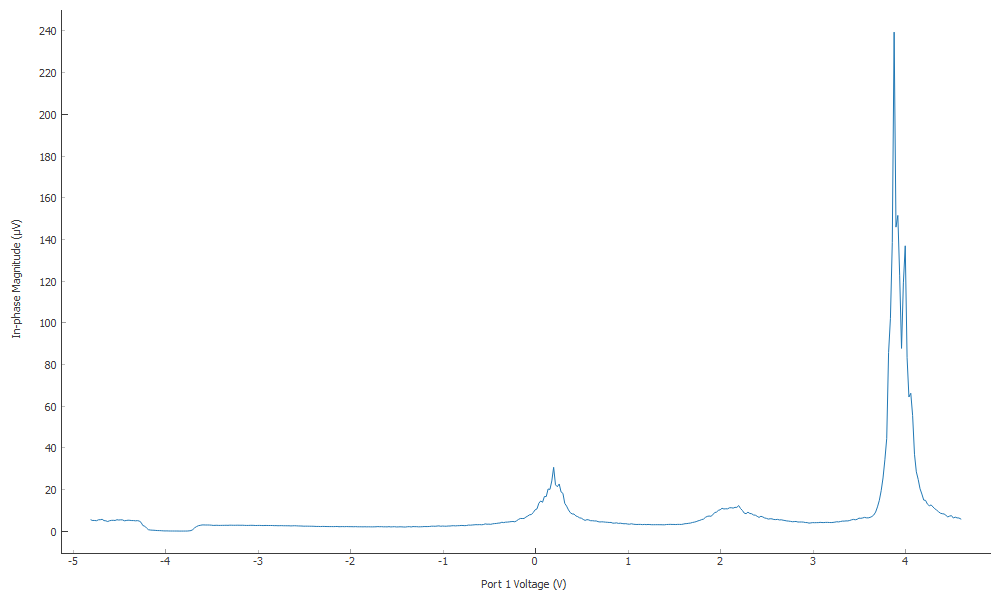

In [436]:
plot101[0]

In [437]:
bgvals = np.linspace(-4.8, 4.8, 481)
Bvals = np.linspace(0, 6, 121)
data102, plot102 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='W3_865_7-8_830_8-9_2nA_0to6T_fieldgate', ZParam=[lockin865.X, lockin830.X])
srframe.volt_p1(0)

Started at 2020-09-29 18:23:35
DataSet:
   location = 'data/2020-09-29/#010_W3_865_7-8_830_8-9_2nA_0to6T_fieldgate_18-23-33'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (121,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (121, 481)
   Measured | lockin865_X                 | X                | (121, 481)
   Measured | lockin865_Y                 | Y                | (121, 481)
   Measured | lockin830_X                 | X                | (121, 481)
   Measured | lockin830_Y                 | Y                | (121, 481)
Finished at 2020-09-30 16:17:08


In [438]:
triton.magnet_POC(1)

In [439]:
bgvals = np.linspace(-4.8, 4.8, 481)
Bvals = np.concatenate((np.linspace(6.05, 7.95, 39), [7.998]))
data103, plot103 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='W3_865_7-8_830_8-9_2nA_6p05to8T_fieldgate', ZParam=[lockin865.X, lockin830.X])
srframe.volt_p1(0)

Started at 2020-09-30 16:17:10
DataSet:
   location = 'data/2020-09-30/#001_W3_865_7-8_830_8-9_2nA_6p05to8T_fieldgate_16-17-09'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (40,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (40, 481)
   Measured | lockin865_X                 | X                | (40, 481)
   Measured | lockin865_Y                 | Y                | (40, 481)
   Measured | lockin830_X                 | X                | (40, 481)
   Measured | lockin830_Y                 | Y                | (40, 481)
Finished at 2020-10-01 09:14:01


In [440]:
triton.field_set_stable(0)

In [441]:
# minus one quarter shows up

# 0 magnetic field T dependence W3

In [442]:
#first one time with 17.777Hz

In [443]:
srframe.volt_p1(-4.8)
time.sleep(30)
gvals = np.linspace(-4.8, 4.8, 481)
data104, plot104 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W3_865_7-8_830_8-9_baseT_2nA_gatesweep_17p777Hz')
srframe.volt_p1(0)

Started at 2020-10-01 10:28:38
DataSet:
   location = 'data/2020-10-01/#001_W3_865_7-8_830_8-9_baseT_2nA_gatesweep_17p777Hz_10-28-37'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (481,)
   Measured | lockin865_X         | X            | (481,)
   Measured | lockin865_Y         | Y            | (481,)
   Measured | lockin830_X         | X            | (481,)
   Measured | lockin830_Y         | Y            | (481,)
Finished at 2020-10-01 10:38:57


In [444]:
srframe.volt_p1(-4.8)
time.sleep(30)
gvals = np.linspace(-4.8, 4.8, 481)
data105, plot105 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W3_865_7-8_830_8-9_baseT_2nA_gatesweep_11p111Hz')
srframe.volt_p1(0)

Started at 2020-10-01 10:43:25
DataSet:
   location = 'data/2020-10-01/#002_W3_865_7-8_830_8-9_baseT_2nA_gatesweep_11p111Hz_10-43-23'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (481,)
   Measured | lockin865_X         | X            | (481,)
   Measured | lockin865_Y         | Y            | (481,)
   Measured | lockin830_X         | X            | (481,)
   Measured | lockin830_Y         | Y            | (481,)
Finished at 2020-10-01 10:53:43


<IPython.core.display.Javascript object>


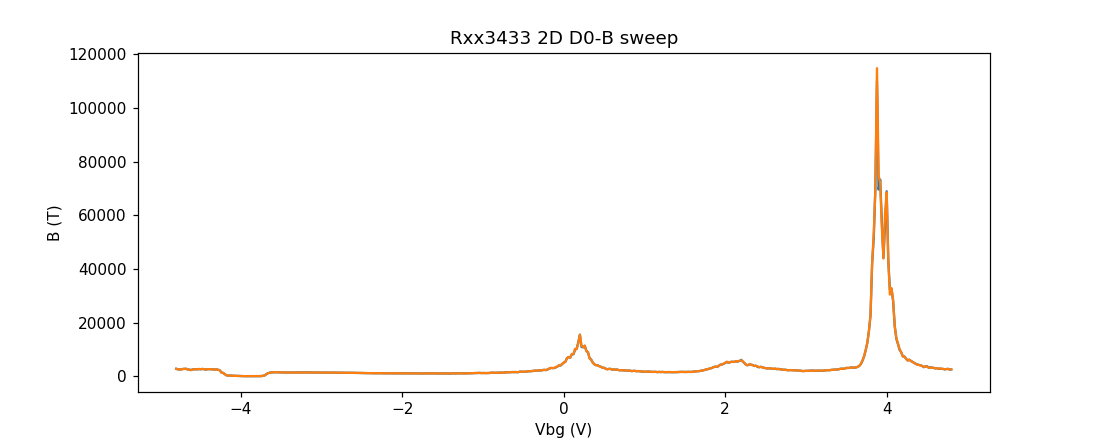

Text(0.5, 1.0, 'Rxx3433 2D D0-B sweep')

In [447]:
plt.figure(figsize=(10, 4))
plt.plot(data104.srframe_volt_p1_set[:], data104.lockin865_X[:]/2e-9, label = '17')
plt.plot(data105.srframe_volt_p1_set[:], data105.lockin865_X[:]/2e-9, label = '11')
plt.xlabel('Vbg (V)')
plt.ylabel('B (T)')
plt.axis()
plt.title('Rxx3433 2D D0-B sweep')

In [448]:
srframe.volt_p1(-5)#baseT sensor disconnected
time.sleep(30)
gvals = np.linspace(-5, 5, 501)
data106, plot106 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='W3_865_7-8_830_8-9_baseT_2nA_gatesweep')
srframe.volt_p1(0)

Started at 2020-10-01 11:01:23
DataSet:
   location = 'data/2020-10-01/#003_W3_865_7-8_830_8-9_baseT_2nA_gatesweep_11-01-21'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (501,)
   Measured | lockin865_X         | X            | (501,)
   Measured | lockin865_Y         | Y            | (501,)
   Measured | lockin830_X         | X            | (501,)
   Measured | lockin830_Y         | Y            | (501,)
Finished at 2020-10-01 11:12:06


In [457]:
triton.pid_range(10)

In [455]:
triton.pid_setpoint(0.05)

In [456]:
triton.pid_mode(1)

In [458]:
srframe.volt_p1(-5)
time.sleep(30)
Tvals = np.linspace(0.05, 1, 20)
bgvals = np.linspace(-5, 4.8, 491)
data107, plot107 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='W3_865_7-8_830_8-9_2nA_0Bfield_gateTsweepto1K', ZParam=[lockin865.X, lockin830.X])
srframe.volt_p1(0)

Started at 2020-10-01 11:21:18
DataSet:
   location = 'data/2020-10-01/#004_W3_865_7-8_830_8-9_2nA_0Bfield_gateTsweepto1K_11-21-17'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (20,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (20, 491)
   Measured | lockin865_X             | X            | (20, 491)
   Measured | lockin865_Y             | Y            | (20, 491)
   Measured | lockin830_X             | X            | (20, 491)
   Measured | lockin830_Y             | Y            | (20, 491)
Finished at 2020-10-01 15:45:17


In [459]:
triton.pid_range(31.6)
time.sleep(10)
triton.pid_setpoint(1.05)

In [460]:
srframe.volt_p1(-5)
time.sleep(30)
Tvals = np.linspace(1.05, 1.4, 8)
bgvals = np.linspace(-5, 4.8, 491)
data108, plot108 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='W3_865_7-8_830_8-9_2nA_0Bfield_gateTsweep1p05to1p4K', ZParam=[lockin865.X, lockin830.X])
srframe.volt_p1(0)

Started at 2020-10-01 15:46:09
DataSet:
   location = 'data/2020-10-01/#005_W3_865_7-8_830_8-9_2nA_0Bfield_gateTsweep1p05to1p4K_15-46-08'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (8,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (8, 491)
   Measured | lockin865_X             | X            | (8, 491)
   Measured | lockin865_Y             | Y            | (8, 491)
   Measured | lockin830_X             | X            | (8, 491)
   Measured | lockin830_Y             | Y            | (8, 491)
Finished at 2020-10-01 17:31:37


In [461]:
triton.pid_range(100)
time.sleep(10)
triton.pid_setpoint(1.45)

In [462]:
srframe.volt_p1(-5)
time.sleep(30)
Tvals = np.linspace(1.45, 2, 12)
bgvals = np.linspace(-5, 4.8, 491)
data109, plot109 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='W3_865_7-8_830_8-9_2nA_0Bfield_gateTsweep1p45to2K', ZParam=[lockin865.X, lockin830.X])
srframe.volt_p1(0)

Started at 2020-10-01 17:32:29
DataSet:
   location = 'data/2020-10-01/#006_W3_865_7-8_830_8-9_2nA_0Bfield_gateTsweep1p45to2K_17-32-28'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (12,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (12, 491)
   Measured | lockin865_X             | X            | (12, 491)
   Measured | lockin865_Y             | Y            | (12, 491)
   Measured | lockin830_X             | X            | (12, 491)
   Measured | lockin830_Y             | Y            | (12, 491)
Finished at 2020-10-01 20:10:24


In [463]:
triton.pid_setpoint(2.1)

In [ ]:
srframe.volt_p1(-5)
time.sleep(30)
Tvals = np.linspace(2.1, 10, 80)
bgvals = np.linspace(-5, 4.8, 491)
data110, plot110 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='W3_865_7-8_830_8-9_2nA_0Bfield_gateTsweep2p1to10K', ZParam=[lockin865.X, lockin830.X])
srframe.volt_p1(0)

Started at 2020-10-01 22:01:43


some meaurement missing in the notebook because the notebook failed directly see the data folder

# go the M20 and check use 1MOhm resistor

In [7]:
srframe.volt_p1(-5)
time.sleep(30)
gvals = np.linspace(-5, 5, 401)
data140, plot140 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y,  DataName='M20_15-16_865_16_21_830_baseT_2nA')
srframe.volt_p1(0)

Started at 2020-10-13 15:43:33
DataSet:
   location = 'data/2020-10-13/#002_M20_15-16_865_16_21_830_baseT_2nA_15-43-27'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
Finished at 2020-10-13 15:52:09


In [9]:
srframe.volt_p1(-5)
time.sleep(30)
gvals = np.linspace(-5, 5, 401)
data141, plot141 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y,  lockin830_2.X, lockin830_2.Y, DataName='M20_14-15_865_16_21_830_15_16_8302_baseT_2nA')
srframe.volt_p1(0)

Started at 2020-10-13 17:27:20
DataSet:
   location = 'data/2020-10-13/#004_M20_14-15_865_16_21_830_15_16_8302_baseT_2nA_17-27-18'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
   Measured | lockin830_2_X       | X            | (401,)
   Measured | lockin830_2_Y       | Y            | (401,)
Finished at 2020-10-13 17:36:25


In [11]:
bgvals = np.linspace(-5, 4.5, 476)
Bvals = np.linspace(0, 6, 61)
data142, plot142 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='M20_14-15_8302_16_21_830_15_16_865_2nA_0to6T_fieldgate', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)

Started at 2020-10-13 18:16:39
DataSet:
   location = 'data/2020-10-13/#006_M20_14-15_8302_16_21_830_15_16_865_2nA_0to6T_fieldgate_18-16-37'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (61,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (61, 476)
   Measured | lockin865_X                 | X                | (61, 476)
   Measured | lockin865_Y                 | Y                | (61, 476)
   Measured | lockin830_X                 | X                | (61, 476)
   Measured | lockin830_Y                 | Y                | (61, 476)
   Measured | lockin830_2_X               | X                | (61, 476)
   Measured | lockin830_2_Y               | Y                | (61, 476)
Finished at 2020-10-14 05:39:51


In [12]:
bgvals = np.linspace(-5, 4.5, 476)
triton.magnet_POC(1)
Bvals = np.concatenate((np.linspace(6.1, 7.9, 19), [7.998]))
data143, plot143 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='M20_14-15_8302_16_21_830_15_16_865_2nA_6p1to8T_fieldgate', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)

Started at 2020-10-14 05:39:53
DataSet:
   location = 'data/2020-10-14/#001_M20_14-15_8302_16_21_830_15_16_865_2nA_6p1to8T_fieldgate_05-39-51'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (20,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (20, 476)
   Measured | lockin865_X                 | X                | (20, 476)
   Measured | lockin865_Y                 | Y                | (20, 476)
   Measured | lockin830_X                 | X                | (20, 476)
   Measured | lockin830_Y                 | Y                | (20, 476)
   Measured | lockin830_2_X               | X                | (20, 476)
   Measured | lockin830_2_Y               | Y                | (20, 476)
Finished at 2020-10-14 14:18:50


In [13]:
triton.field_set_stable(0)

In [14]:
srframe.volt_p1(5)
time.sleep(30)
gvals = np.linspace(5, -5, 401)
data144, plot144 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y,  lockin830_2.X, lockin830_2.Y, DataName='M20_15-16_865_16_21_830_14_15_8302_baseT_2nA')
srframe.volt_p1(0)

Started at 2020-10-14 15:12:13
DataSet:
   location = 'data/2020-10-14/#002_M20_15-16_865_16_21_830_14_15_8302_baseT_2nA_15-12-11'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
   Measured | lockin830_2_X       | X            | (401,)
   Measured | lockin830_2_Y       | Y            | (401,)
Finished at 2020-10-14 15:21:18


In [15]:
srframe.volt_p1(5)#use 1kOhm
time.sleep(30)
gvals = np.linspace(5, -5, 401)
data145, plot145 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y,  lockin830_2.X, lockin830_2.Y, DataName='M20_15-16_865_16_21_830_14_15_8302_baseT_2nA')
srframe.volt_p1(0)

Started at 2020-10-14 15:24:50
DataSet:
   location = 'data/2020-10-14/#003_M20_15-16_865_16_21_830_14_15_8302_baseT_2nA_15-24-48'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
   Measured | lockin830_2_X       | X            | (401,)
   Measured | lockin830_2_Y       | Y            | (401,)
Finished at 2020-10-14 15:33:55


# M20 T dependence

In [16]:
srframe.volt_p1(4.5)#sensor disconnected
time.sleep(30)
gvals = np.linspace(4.5, -5, 476)
data146, plot146 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y,  lockin830_2.X, lockin830_2.Y, DataName='M20_15-16_865_16_21_830_14_15_8302_baseT_2nA')
srframe.volt_p1(0)

Started at 2020-10-14 15:41:10
DataSet:
   location = 'data/2020-10-14/#004_M20_15-16_865_16_21_830_14_15_8302_baseT_2nA_15-41-08'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (476,)
   Measured | lockin865_X         | X            | (476,)
   Measured | lockin865_Y         | Y            | (476,)
   Measured | lockin830_X         | X            | (476,)
   Measured | lockin830_Y         | Y            | (476,)
   Measured | lockin830_2_X       | X            | (476,)
   Measured | lockin830_2_Y       | Y            | (476,)
Finished at 2020-10-14 15:51:57


In [23]:
triton.pid_range(10)

In [21]:
triton.pid_setpoint(0.05)

In [22]:
triton.pid_mode(1)

In [24]:
srframe.volt_p1(4.5)
time.sleep(30)
Tvals = np.linspace(0.05, 1, 20)
bgvals = np.linspace(4.5, -5, 476)
data147, plot147 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='M20_15-16_865_16_21_830_14_15_8302_2nA_0Bfield_gateTsweepto1K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)

Started at 2020-10-14 15:59:08
DataSet:
   location = 'data/2020-10-14/#005_M20_15-16_865_16_21_830_14_15_8302_2nA_0Bfield_gateTsweepto1K_15-59-06'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (20,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (20, 476)
   Measured | lockin865_X             | X            | (20, 476)
   Measured | lockin865_Y             | Y            | (20, 476)
   Measured | lockin830_X             | X            | (20, 476)
   Measured | lockin830_Y             | Y            | (20, 476)
   Measured | lockin830_2_X           | X            | (20, 476)
   Measured | lockin830_2_Y           | Y            | (20, 476)
Finished at 2020-10-14 20:21:32


In [25]:
triton.pid_range(31.6)
time.sleep(10)
triton.pid_setpoint(1.05)

In [26]:
srframe.volt_p1(4.5)
time.sleep(30)
Tvals = np.linspace(1.05, 1.4, 8)
bgvals = np.linspace(4.5, -5, 476)
data148, plot148 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='M20_15-16_865_16_21_830_14_15_8302_2nA_0Bfield_gateTsweep1p05to1p4K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)

Started at 2020-10-14 20:22:24
DataSet:
   location = 'data/2020-10-14/#006_M20_15-16_865_16_21_830_14_15_8302_2nA_0Bfield_gateTsweep1p05to1p4K_20-22-22'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (8,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (8, 476)
   Measured | lockin865_X             | X            | (8, 476)
   Measured | lockin865_Y             | Y            | (8, 476)
   Measured | lockin830_X             | X            | (8, 476)
   Measured | lockin830_Y             | Y            | (8, 476)
   Measured | lockin830_2_X           | X            | (8, 476)
   Measured | lockin830_2_Y           | Y            | (8, 476)
Finished at 2020-10-14 22:07:10


In [27]:
triton.pid_range(100)
time.sleep(10)
triton.pid_setpoint(1.45)

In [28]:
srframe.volt_p1(4.5)
time.sleep(30)
Tvals = np.linspace(1.45, 2, 12)
bgvals = np.linspace(4.5, -5, 476)
data149, plot149 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='M20_15-16_865_16_21_830_14_15_8302_2nA_0Bfield_gateTsweep1p45to2K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)

Started at 2020-10-14 22:08:02
DataSet:
   location = 'data/2020-10-14/#007_M20_15-16_865_16_21_830_14_15_8302_2nA_0Bfield_gateTsweep1p45to2K_22-08-00'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (12,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (12, 476)
   Measured | lockin865_X             | X            | (12, 476)
   Measured | lockin865_Y             | Y            | (12, 476)
   Measured | lockin830_X             | X            | (12, 476)
   Measured | lockin830_Y             | Y            | (12, 476)
   Measured | lockin830_2_X           | X            | (12, 476)
   Measured | lockin830_2_Y           | Y            | (12, 476)
Finished at 2020-10-15 00:45:30


In [29]:
triton.pid_setpoint(2.1)

In [30]:
srframe.volt_p1(4.5)
time.sleep(30)
Tvals = np.linspace(2.1, 10, 80)
bgvals = np.linspace(4.5, -5, 476)
data150, plot150 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=180, SetDelay2=1.1, Param2_SetBetween=0, DataName='M20_15-16_865_16_21_830_14_15_8302_2nA_0Bfield_gateTsweep2p1to10K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)

Started at 2020-10-15 00:53:37
DataSet:
   location = 'data/2020-10-15/#001_M20_15-16_865_16_21_830_14_15_8302_2nA_0Bfield_gateTsweep2p1to10K_00-53-35'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (80,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (80, 476)
   Measured | lockin865_X             | X            | (80, 476)
   Measured | lockin865_Y             | Y            | (80, 476)
   Measured | lockin830_X             | X            | (80, 476)
   Measured | lockin830_Y             | Y            | (80, 476)
   Measured | lockin830_2_X           | X            | (80, 476)
   Measured | lockin830_2_Y           | Y            | (80, 476)
Finished at 2020-10-15 18:24:05


In [31]:
srframe.volt_p1(4.5)
time.sleep(30)
Tvals = np.linspace(10.5, 30, 40)
bgvals = np.linspace(4.5, -5, 476)
data151, plot151 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=240, SetDelay2=1.1, Param2_SetBetween=0, DataName='M20_15-16_865_16_21_830_14_15_8302_2nA_0Bfield_gateTsweep10p5to30K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)

Started at 2020-10-15 18:24:46
DataSet:
   location = 'data/2020-10-15/#002_M20_15-16_865_16_21_830_14_15_8302_2nA_0Bfield_gateTsweep10p5to30K_18-24-44'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (40,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (40, 476)
   Measured | lockin865_X             | X            | (40, 476)
   Measured | lockin865_Y             | Y            | (40, 476)
   Measured | lockin830_X             | X            | (40, 476)
   Measured | lockin830_Y             | Y            | (40, 476)
   Measured | lockin830_2_X           | X            | (40, 476)
   Measured | lockin830_2_Y           | Y            | (40, 476)
Finished at 2020-10-16 03:53:18


In [32]:
triton.V1('CLOSE')

In [33]:
time.sleep(60)

In [34]:
srframe.volt_p1(4.5)
time.sleep(30)
Tvals = np.linspace(30.5, 40, 20)
bgvals = np.linspace(4.5, -5, 476)
data152, plot152 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=420, SetDelay2=1.1, Param2_SetBetween=0, DataName='M20_15-16_865_16_21_830_14_15_8302_2nA_0Bfield_gateTsweep30p5to40K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)

Started at 2020-10-16 03:54:59
DataSet:
   location = 'data/2020-10-16/#001_M20_15-16_865_16_21_830_14_15_8302_2nA_0Bfield_gateTsweep30p5to40K_03-54-58'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (20,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (20, 476)
   Measured | lockin865_X             | X            | (20, 476)
   Measured | lockin865_Y             | Y            | (20, 476)
   Measured | lockin830_X             | X            | (20, 476)
   Measured | lockin830_Y             | Y            | (20, 476)
   Measured | lockin830_2_X           | X            | (20, 476)
   Measured | lockin830_2_Y           | Y            | (20, 476)
Finished at 2020-10-16 09:37:02


In [62]:
triton.read_temps()

MC - on:  10.5906 K
MC_cernox - on:  10.557 K
still - on:  9.35053 K
cold_plate - on:  10.2123 K
magnet - on:  2.18472 K
PT2h - on:  3.39919 K
PT2p - on:  3.65794 K
PT1h - on:  46.7292 K
PT1p - on:  62.222 K


In [65]:
lockin865.amplitude(0.5)

In [79]:
triton.pid_range(100)

In [83]:
triton.pid_setpoint(3)

In [71]:
triton.pid_mode(1)

# M20 go to 3K in plane field

In [84]:
srframe.volt_p1(3.6)#sensor disconnected
time.sleep(30)
gvals = np.linspace(3.6, -3.6, 361)
data153, plot153 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y,  lockin830_2.X, lockin830_2.Y, DataName='M20_15-16_865_16_21_830_14_15_8302_3K_5nA')
srframe.volt_p1(0)

Started at 2020-10-16 15:07:35
DataSet:
   location = 'data/2020-10-16/#002_M20_15-16_865_16_21_830_14_15_8302_3K_5nA_15-07-33'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (361,)
   Measured | lockin865_X         | X            | (361,)
   Measured | lockin865_Y         | Y            | (361,)
   Measured | lockin830_X         | X            | (361,)
   Measured | lockin830_Y         | Y            | (361,)
   Measured | lockin830_2_X       | X            | (361,)
   Measured | lockin830_2_Y       | Y            | (361,)
Finished at 2020-10-16 15:15:46


In [85]:
bgvals = np.linspace(3.6, -3.6, 577)
Bvals = np.linspace(0, 6, 61)
data154, plot154 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='M20_15-16_865_16_21_830_14_15_8302_5nA_0to6T_fieldgate_3K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)

Started at 2020-10-16 15:21:23
DataSet:
   location = 'data/2020-10-16/#003_M20_15-16_865_16_21_830_14_15_8302_5nA_0to6T_fieldgate_3K_15-21-21'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (61,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (61, 577)
   Measured | lockin865_X                 | X                | (61, 577)
   Measured | lockin865_Y                 | Y                | (61, 577)
   Measured | lockin830_X                 | X                | (61, 577)
   Measured | lockin830_Y                 | Y                | (61, 577)
   Measured | lockin830_2_X               | X                | (61, 577)
   Measured | lockin830_2_Y               | Y                | (61, 577)
Finished at 2020-10-17 04:47:19


In [86]:
bgvals = np.linspace(3.6, -3.6, 577)
triton.magnet_POC(1)
Bvals = np.concatenate((np.linspace(6.1, 7.9, 19), [7.998]))
data155, plot155 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='M20_15-16_865_16_21_830_14_15_8302_5nA_6p1to8T_fieldgate_3K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)

Started at 2020-10-17 04:47:21
DataSet:
   location = 'data/2020-10-17/#001_M20_15-16_865_16_21_830_14_15_8302_5nA_6p1to8T_fieldgate_3K_04-47-19'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (20,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (20, 577)
   Measured | lockin865_X                 | X                | (20, 577)
   Measured | lockin865_Y                 | Y                | (20, 577)
   Measured | lockin830_X                 | X                | (20, 577)
   Measured | lockin830_Y                 | Y                | (20, 577)
   Measured | lockin830_2_X               | X                | (20, 577)
   Measured | lockin830_2_Y               | Y                | (20, 577)
Finished at 2020-10-17 14:01:04


# M20 go to 5K in plane field

In [87]:
triton.pid_setpoint(5)

In [88]:
time.sleep(1200)

In [89]:
bgvals = np.linspace(3.6, -3.6, 577)
triton.magnet_POC(1)
Bvals = np.concatenate(([7.998], np.linspace(7.9, 6.1, 19)))
data156, plot156 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='M20_15-16_865_16_21_830_14_15_8302_5nA_8to6p1T_fieldgate_5K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)

Started at 2020-10-17 14:21:08
DataSet:
   location = 'data/2020-10-17/#002_M20_15-16_865_16_21_830_14_15_8302_5nA_8to6p1T_fieldgate_5K_14-21-06'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (20,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (20, 577)
   Measured | lockin865_X                 | X                | (20, 577)
   Measured | lockin865_Y                 | Y                | (20, 577)
   Measured | lockin830_X                 | X                | (20, 577)
   Measured | lockin830_Y                 | Y                | (20, 577)
   Measured | lockin830_2_X               | X                | (20, 577)
   Measured | lockin830_2_Y               | Y                | (20, 577)
Finished at 2020-10-17 23:41:27


In [90]:
bgvals = np.linspace(3.6, -3.6, 577)
triton.magnet_POC(0)
Bvals = np.linspace(6, 0, 61)
data157, plot157 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='M20_15-16_865_16_21_830_14_15_8302_5nA_6to0T_fieldgate_5K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)

Started at 2020-10-17 23:41:29
DataSet:
   location = 'data/2020-10-17/#003_M20_15-16_865_16_21_830_14_15_8302_5nA_6to0T_fieldgate_5K_23-41-27'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (61,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (61, 577)
   Measured | lockin865_X                 | X                | (61, 577)
   Measured | lockin865_Y                 | Y                | (61, 577)
   Measured | lockin830_X                 | X                | (61, 577)
   Measured | lockin830_Y                 | Y                | (61, 577)
   Measured | lockin830_2_X               | X                | (61, 577)
   Measured | lockin830_2_Y               | Y                | (61, 577)
Finished at 2020-10-18 13:15:05


# M20 go to 8K in plane field

In [91]:
triton.pid_setpoint(8)

In [92]:
time.sleep(1200)

In [93]:
bgvals = np.linspace(3.6, -3.6, 577)
triton.magnet_POC(0)
Bvals = np.linspace(0, 6, 61)
data158, plot158 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='M20_15-16_865_16_21_830_14_15_8302_5nA_0to6T_fieldgate_8K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)

Started at 2020-10-18 13:35:09
DataSet:
   location = 'data/2020-10-18/#001_M20_15-16_865_16_21_830_14_15_8302_5nA_0to6T_fieldgate_8K_13-35-07'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (61,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (61, 577)
   Measured | lockin865_X                 | X                | (61, 577)
   Measured | lockin865_Y                 | Y                | (61, 577)
   Measured | lockin830_X                 | X                | (61, 577)
   Measured | lockin830_Y                 | Y                | (61, 577)
   Measured | lockin830_2_X               | X                | (61, 577)
   Measured | lockin830_2_Y               | Y                | (61, 577)
Finished at 2020-10-19 03:02:15


In [94]:
bgvals = np.linspace(3.6, -3.6, 577)
triton.magnet_POC(1)
Bvals = np.concatenate((np.linspace(6.1, 7.9, 19), [7.998]))
data159, plot159 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='M20_15-16_865_16_21_830_14_15_8302_5nA_6p1to8T_fieldgate_8K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)

Started at 2020-10-19 03:02:33
DataSet:
   location = 'data/2020-10-19/#001_M20_15-16_865_16_21_830_14_15_8302_5nA_6p1to8T_fieldgate_8K_03-02-24'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (20,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (20, 577)
   Measured | lockin865_X                 | X                | (20, 577)
   Measured | lockin865_Y                 | Y                | (20, 577)
   Measured | lockin830_X                 | X                | (20, 577)
   Measured | lockin830_Y                 | Y                | (20, 577)
   Measured | lockin830_2_X               | X                | (20, 577)
   Measured | lockin830_2_Y               | Y                | (20, 577)
Finished at 2020-10-19 12:15:40


# M20 go to 10K in plane field

In [95]:
triton.pid_setpoint(10)

In [96]:
time.sleep(1200)

In [97]:
bgvals = np.linspace(3.6, -3.6, 577)
triton.magnet_POC(1)
Bvals = np.concatenate(([7.998], np.linspace(7.8, 6.2, 9)))
data160, plot160 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='M20_15-16_865_16_21_830_14_15_8302_5nA_8to6p2T_fieldgate_10K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)

Started at 2020-10-19 12:35:44
DataSet:
   location = 'data/2020-10-19/#002_M20_15-16_865_16_21_830_14_15_8302_5nA_8to6p2T_fieldgate_10K_12-35-42'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (10,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (10, 577)
   Measured | lockin865_X                 | X                | (10, 577)
   Measured | lockin865_Y                 | Y                | (10, 577)
   Measured | lockin830_X                 | X                | (10, 577)
   Measured | lockin830_Y                 | Y                | (10, 577)
   Measured | lockin830_2_X               | X                | (10, 577)
   Measured | lockin830_2_Y               | Y                | (10, 577)
Finished at 2020-10-19 17:20:53


In [98]:
bgvals = np.linspace(3.6, -3.6, 577)
triton.magnet_POC(0)
Bvals = np.linspace(6, 0, 61)
data161, plot161 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='M20_15-16_865_16_21_830_14_15_8302_5nA_6to0T_fieldgate_10K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)

Started at 2020-10-19 17:20:55
DataSet:
   location = 'data/2020-10-19/#003_M20_15-16_865_16_21_830_14_15_8302_5nA_6to0T_fieldgate_10K_17-20-53'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (61,)
   Setpoint | srframe_volt_p1_set         | volt_p1          | (61, 577)
   Measured | lockin865_X                 | X                | (61, 577)
   Measured | lockin865_Y                 | Y                | (61, 577)
   Measured | lockin830_X                 | X                | (61, 577)
   Measured | lockin830_Y                 | Y                | (61, 577)
   Measured | lockin830_2_X               | X                | (61, 577)
   Measured | lockin830_2_Y               | Y                | (61, 577)
Finished at 2020-10-20 06:55:24


In [99]:
triton.magnet_POC(1)

In [101]:
triton.field_set_stable(0.1)

In [102]:
triton.field_set_stable(0)

In [103]:
lockin865.amplitude(0)

In [107]:
triton.pid_setpoint(40)

In [108]:
triton.close()
srframe.close()
lockin865.close()
lockin830.close()
lockin830_2.close()
k2182.close()